In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr


1 - Load input files

In [3]:
# ---------- Load methylation summaries ----------
df_all = pd.read_csv("../alltissues_oocyteNoALLC/NHIP_10categories_promoter_genebody_means.csv")

# Keep only cumulus and oocytes
df_meth = df_all[df_all["x_label"].isin(["cumulus:ROI", "oocytes:ROI"])].copy()
df_meth

,x_label,sample,group,promoter_mean,genebody_mean
107,cumulus:ROI,MC03,Stressed,NaN,0.975783
108,cumulus:ROI,MC09,Stressed,NaN,0.933642
109,cumulus:ROI,MC10,Stressed,0.739316,0.901042
110,cumulus:ROI,MC11,Stressed,NaN,0.901214
111,cumulus:ROI,MC12,Stressed,0.562500,0.922365
...,...,...,...,...,...
278,oocytes:ROI,4660644938SO2NC1N9C,Control,NaN,0.800000
279,oocytes:ROI,4660644938SO3NC1O9C,Control,NaN,0.736842
280,oocytes:ROI,4660644993PO2NC5D10C,Control,NaN,0.696429
281,oocytes:ROI,4660644993PO3NC5E10C,Control,NaN,0.820513


2- Attach Animal ID
 - Cumulus Animal ID

In [4]:
meta_cum = pd.read_csv(
    "/quobyte/lasallegrp/Ensi/project/nhip_macaque/nhip_cumulus/sample_info.csv",
    sep="\t"
)[["Name", "AnimalID"]]
meta_cum

,Name,AnimalID
0,MC03,38897
1,MC04,38897
2,MC09,39053
3,MC10,39053
4,MC11,39053
...,...,...
72,MC92,46363
73,MC93,46606
74,MC94,46606
75,MC95,46606


In [5]:


df_meth = df_meth.merge(
    meta_cum,
    left_on="sample",
    right_on="Name",
    how="left"
)

df_meth.drop(columns=["Name"], inplace=True)
df_meth

,x_label,sample,group,promoter_mean,genebody_mean,AnimalID
0,cumulus:ROI,MC03,Stressed,NaN,0.975783,38897.0
1,cumulus:ROI,MC09,Stressed,NaN,0.933642,39053.0
2,cumulus:ROI,MC10,Stressed,0.739316,0.901042,39053.0
3,cumulus:ROI,MC11,Stressed,NaN,0.901214,39053.0
4,cumulus:ROI,MC12,Stressed,0.562500,0.922365,41237.0
...,...,...,...,...,...,...
171,oocytes:ROI,4660644938SO2NC1N9C,Control,NaN,0.800000,NaN
172,oocytes:ROI,4660644938SO3NC1O9C,Control,NaN,0.736842,NaN
173,oocytes:ROI,4660644993PO2NC5D10C,Control,NaN,0.696429,NaN
174,oocytes:ROI,4660644993PO3NC5E10C,Control,NaN,0.820513,NaN


- Oocytes: AnimalID from cell metadata

In [7]:
meta_ooc = pd.read_csv(
    "/quobyte/lasallegrp/Ensi/project/nhip_macaque/corr_metabolites/CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv", sep = "\t"
)[["SampleID", "AnimalID"]]
meta_ooc

,SampleID,AnimalID
0,4129944636SOeNC1L1S,41299
1,4211144957SO1NC1H4C,42111
2,4499445005SO1NC1P5C,44994
3,4146045001PO3NC4G4C,41460
4,4499445005SO3NC1D6C,44994
...,...,...
99,4265145042SO3NC1F5S,42651
100,4302844664PO2NC5K5C,43028
101,4139144923PO1NC3H3C,41391
102,4660644938SO1NC1M9C,46606


In [8]:


df_meth = df_meth.merge(
    meta_ooc,
    left_on="sample",
    right_on="SampleID",
    how="left"
)

df_meth.drop(columns=["SampleID"], inplace=True)
df_meth

df_meth["AnimalID"] = (
    df_meth["AnimalID_x"]
    .combine_first(df_meth["AnimalID_y"])
).astype(str)

df_meth = df_meth.drop(columns=["AnimalID_x", "AnimalID_y"])

df_meth["AnimalID"] = pd.to_numeric(df_meth["AnimalID"], errors="coerce")
df_meth["AnimalID"] = df_meth["AnimalID"].astype("Int64")  # nullable integer
#df_meth["AnimalID"] = df_meth["AnimalID"].astype("string")

df_meth

,x_label,sample,group,promoter_mean,genebody_mean,AnimalID
0,cumulus:ROI,MC03,Stressed,NaN,0.975783,38897
1,cumulus:ROI,MC09,Stressed,NaN,0.933642,39053
2,cumulus:ROI,MC10,Stressed,0.739316,0.901042,39053
3,cumulus:ROI,MC11,Stressed,NaN,0.901214,39053
4,cumulus:ROI,MC12,Stressed,0.562500,0.922365,41237
...,...,...,...,...,...,...
171,oocytes:ROI,4660644938SO2NC1N9C,Control,NaN,0.800000,46606
172,oocytes:ROI,4660644938SO3NC1O9C,Control,NaN,0.736842,46606
173,oocytes:ROI,4660644993PO2NC5D10C,Control,NaN,0.696429,46606
174,oocytes:ROI,4660644993PO3NC5E10C,Control,NaN,0.820513,46606


3- Average methylation per animal 

In [9]:
df_animal = (
    df_meth
    .groupby(["x_label", "AnimalID"], as_index=False)
    .agg(
        CpG_island_mean=("promoter_mean", "mean"),
        GeneBody_mean=("genebody_mean", "mean")
    )
)

df_animal.dropna(subset=["AnimalID"], inplace=True)
df_animal

,x_label,AnimalID,CpG_island_mean,GeneBody_mean
0,cumulus:ROI,38897,NaN,0.975783
1,cumulus:ROI,39053,0.739316,0.911966
2,cumulus:ROI,41237,0.781250,0.919242
3,cumulus:ROI,41299,0.566667,0.894310
4,cumulus:ROI,41391,0.723621,0.903266
5,cumulus:ROI,41460,0.733333,0.899828
6,cumulus:ROI,42111,0.800000,0.904704
7,cumulus:ROI,42473,0.639640,0.906645
8,cumulus:ROI,42651,NaN,0.902402
9,cumulus:ROI,43028,NaN,0.949390


4- Locad metabolites data

In [10]:
met = pd.read_csv("PSOAnimalResults-all.csv", sep ="\t")

met.rename(columns={
    "Animal ID": "AnimalID"
}, inplace=True)
met = met.loc[:, ~met.columns.str.contains("^Unnamed")]

met = met.dropna(how="all")

met["AnimalID"] = met["AnimalID"].astype("Int64")
met

,AnimalID,Cortisol Values ug/dl,Lactate Values ng/mL,Cortisone Values pg/mL,Pyruvate values ng/mL,Progesterone Values pg/mL,Glucose Values mg/mL,Estrogen Values pg/mL,AMH levels! (ng/mL) 2023
0,41237,1.58,7.27,4.38,0.54,0.54,4.04,2.47,6.93
1,41460,1.29,7.04,4.95,6.49,0.98,4.57,3.77,6.80
2,41391,1.40,6.75,5.03,6.47,0.67,4.30,4.25,6.69
3,45208,1.27,7.00,5.44,6.29,0.51,3.70,3.92,5.96
4,46363,1.28,7.25,4.39,5.66,0.57,4.90,3.46,6.55
5,43028,1.51,5.90,4.74,5.54,0.72,5.39,4.21,6.57
6,44218,1.17,6.33,4.91,5.79,0.79,3.95,4.73,5.78
7,45669,1.24,6.73,4.55,6.35,0.70,2.77,4.23,6.79
8,45982,1.26,7.07,4.70,4.56,0.82,3.79,4.19,6.06
9,43051,1.39,6.99,5.19,6.24,0.87,4.34,3.64,6.81


- clean up names

In [11]:
met.columns = (
    met.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("!", "")
)


5- merge methylation + metaboliote data

In [12]:
df_merge = df_animal.merge(met, on="AnimalID", how="inner")
df_merge

,x_label,AnimalID,CpG_island_mean,GeneBody_mean,Cortisol_Values_ug_dl,Lactate_Values_ng_mL,Cortisone_Values_pg_mL,Pyruvate_values_ng_mL,Progesterone_Values_pg_mL,Glucose_Values_mg_mL,Estrogen_Values_pg_mL,AMH_levels_(ng_mL)_2023
0,cumulus:ROI,41237,0.781250,0.919242,1.58,7.27,4.38,0.54,0.54,4.04,2.47,6.93
1,oocytes:ROI,41237,0.000000,0.494382,1.58,7.27,4.38,0.54,0.54,4.04,2.47,6.93
2,cumulus:ROI,41299,0.566667,0.894310,1.26,6.92,4.16,4.25,0.33,3.95,3.79,6.58
3,oocytes:ROI,41299,0.000000,0.598783,1.26,6.92,4.16,4.25,0.33,3.95,3.79,6.58
4,cumulus:ROI,41391,0.723621,0.903266,1.40,6.75,5.03,6.47,0.67,4.30,4.25,6.69
5,oocytes:ROI,41391,0.005291,0.595959,1.40,6.75,5.03,6.47,0.67,4.30,4.25,6.69
6,cumulus:ROI,41460,0.733333,0.899828,1.29,7.04,4.95,6.49,0.98,4.57,3.77,6.80
7,oocytes:ROI,41460,0.000000,0.742490,1.29,7.04,4.95,6.49,0.98,4.57,3.77,6.80
8,cumulus:ROI,42111,0.800000,0.904704,1.24,6.39,3.70,6.22,0.70,3.31,3.67,5.55
9,oocytes:ROI,42111,0.000000,0.668401,1.24,6.39,3.70,6.22,0.70,3.31,3.67,5.55


6- Correlation function

In [13]:
def run_correlations(df, tissue_label, meth_col, method="pearson"):
    rows = []
    metabolites = [
        "Cortisol_Values_ug_dl",
        "Lactate_Values_ng_mL",
        "Cortisone_Values_pg_mL",
        "Pyruvate_values_ng_mL",
        "Progesterone_Values_pg_mL",
        "Glucose_Values_mg_mL",
        "Estrogen_Values_pg_mL",
        "AMH_levels_ng_mL_2023"
    ]

    d = df[df["x_label"] == tissue_label]

    for met_col in metabolites:
        if met_col not in d.columns:
            continue

        x = d[meth_col]
        y = d[met_col]

        mask = x.notna() & y.notna()
        if mask.sum() < 4:
            continue

        if method == "pearson":
            r, p = pearsonr(x[mask], y[mask])
        else:
            r, p = spearmanr(x[mask], y[mask])

        rows.append({
            "Tissue": tissue_label,
            "Methylation": meth_col,
            "Metabolite": met_col,
            "N_animals": mask.sum(),
            "Correlation": r,
            "P_value": p,
            "Method": method
        })

    return pd.DataFrame(rows)


7- Run everything

In [14]:
results = []

for tissue in ["cumulus:ROI", "oocytes:ROI"]:
    results.append(run_correlations(df_merge, tissue, "CpG_island_mean"))
    results.append(run_correlations(df_merge, tissue, "GeneBody_mean"))

df_corr = pd.concat(results, ignore_index=True)


8- multiple testing correction

In [15]:
from statsmodels.stats.multitest import multipletests

# FDR over tissue and methylation feature 
#df_corr["FDR"] = multipletests(df_corr["P_value"], method="fdr_bh")[1]

# FDR sepretaed by methylation feature

# df_corr["FDR_sepMeth"] = np.nan

# for meth in df_corr["Methylation"].unique():
#     m = df_corr["Methylation"] == meth
#     df_corr.loc[m, "FDR_sepMeth"] = multipletests(df_corr.loc[m, "P_value"], method="fdr_bh")[1]


- FDR separately per tissue AND methylation feature

In [16]:
df_corr["FDR_sepTissueMeth"] = np.nan

for (tissue, meth), sub in df_corr.groupby(["Tissue", "Methylation"]):
    idx = sub.index
    df_corr.loc[idx, "FDR_sepTissueMeth"] = multipletests(sub["P_value"], method="fdr_bh")[1]


9-save results

In [17]:
df_corr.to_csv("NHIP_metabolite_correlations_pearson.csv", index=False)

df_corr.sort_values("FDR_sepTissueMeth")


,Tissue,Methylation,Metabolite,N_animals,Correlation,P_value,Method,FDR_sepTissueMeth
27,oocytes:ROI,GeneBody_mean,Estrogen_Values_pg_mL,16,0.457707,0.074632,pearson,0.261211
25,oocytes:ROI,GeneBody_mean,Progesterone_Values_pg_mL,16,0.469144,0.066768,pearson,0.261211
24,oocytes:ROI,GeneBody_mean,Pyruvate_values_ng_mL,16,0.363021,0.166976,pearson,0.292207
22,oocytes:ROI,GeneBody_mean,Lactate_Values_ng_mL,16,-0.373775,0.153830,pearson,0.292207
16,oocytes:ROI,CpG_island_mean,Cortisone_Values_pg_mL,11,0.370275,0.262320,pearson,0.612081
15,oocytes:ROI,CpG_island_mean,Lactate_Values_ng_mL,11,0.374116,0.257014,pearson,0.612081
14,oocytes:ROI,CpG_island_mean,Cortisol_Values_ug_dl,11,-0.381969,0.246357,pearson,0.612081
23,oocytes:ROI,GeneBody_mean,Cortisone_Values_pg_mL,16,0.095025,0.726293,pearson,0.768062
21,oocytes:ROI,GeneBody_mean,Cortisol_Values_ug_dl,16,0.080107,0.768062,pearson,0.768062
26,oocytes:ROI,GeneBody_mean,Glucose_Values_mg_mL,16,0.160907,0.551630,pearson,0.768062


10- visulizing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

df_corr = pd.read_csv("NHIP_metabolite_correlations_pearson.csv")

# If needed, rename tissue labels for nicer plotting
df_corr["Tissue"] = df_corr["Tissue"].replace({
    "cumulus:ROI": "Cumulus",
    "oocytes:ROI": "Oocytes",
})


11- Make a heatmap (Correlation r), one heatmap per tissue
This heatmap shows the correlation coefficient , with metabolites on x-axis and methylation feature on y-axis.

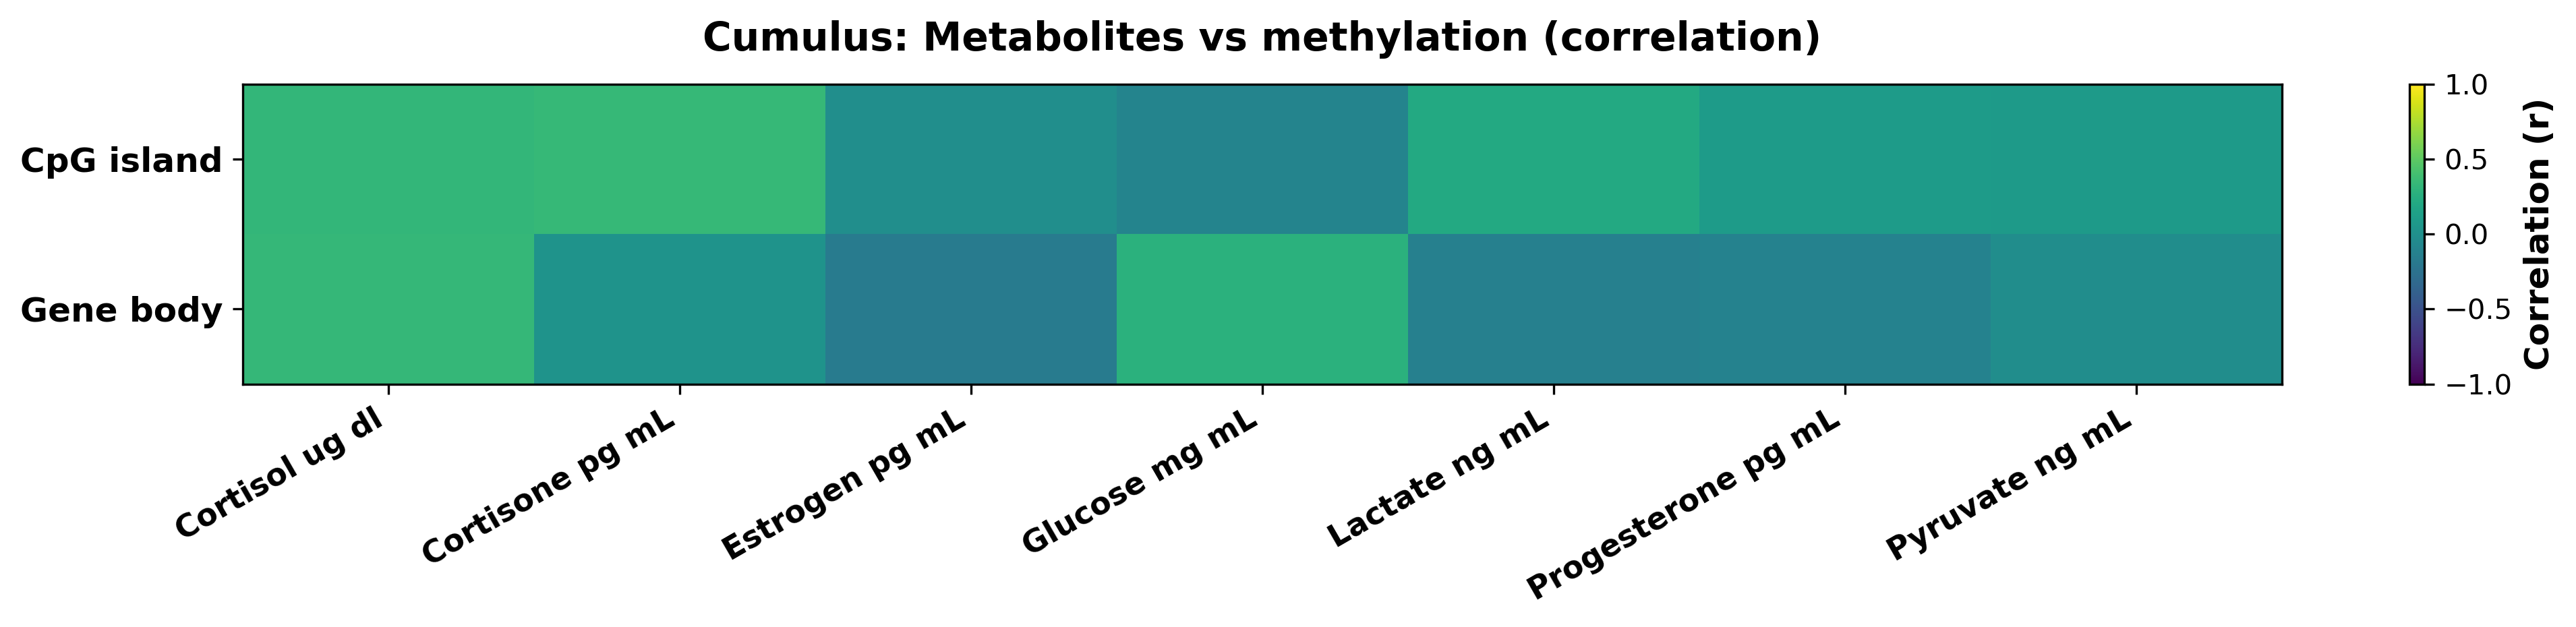

Saved: NHIP_heatmap_Cumulus_corr.pdf


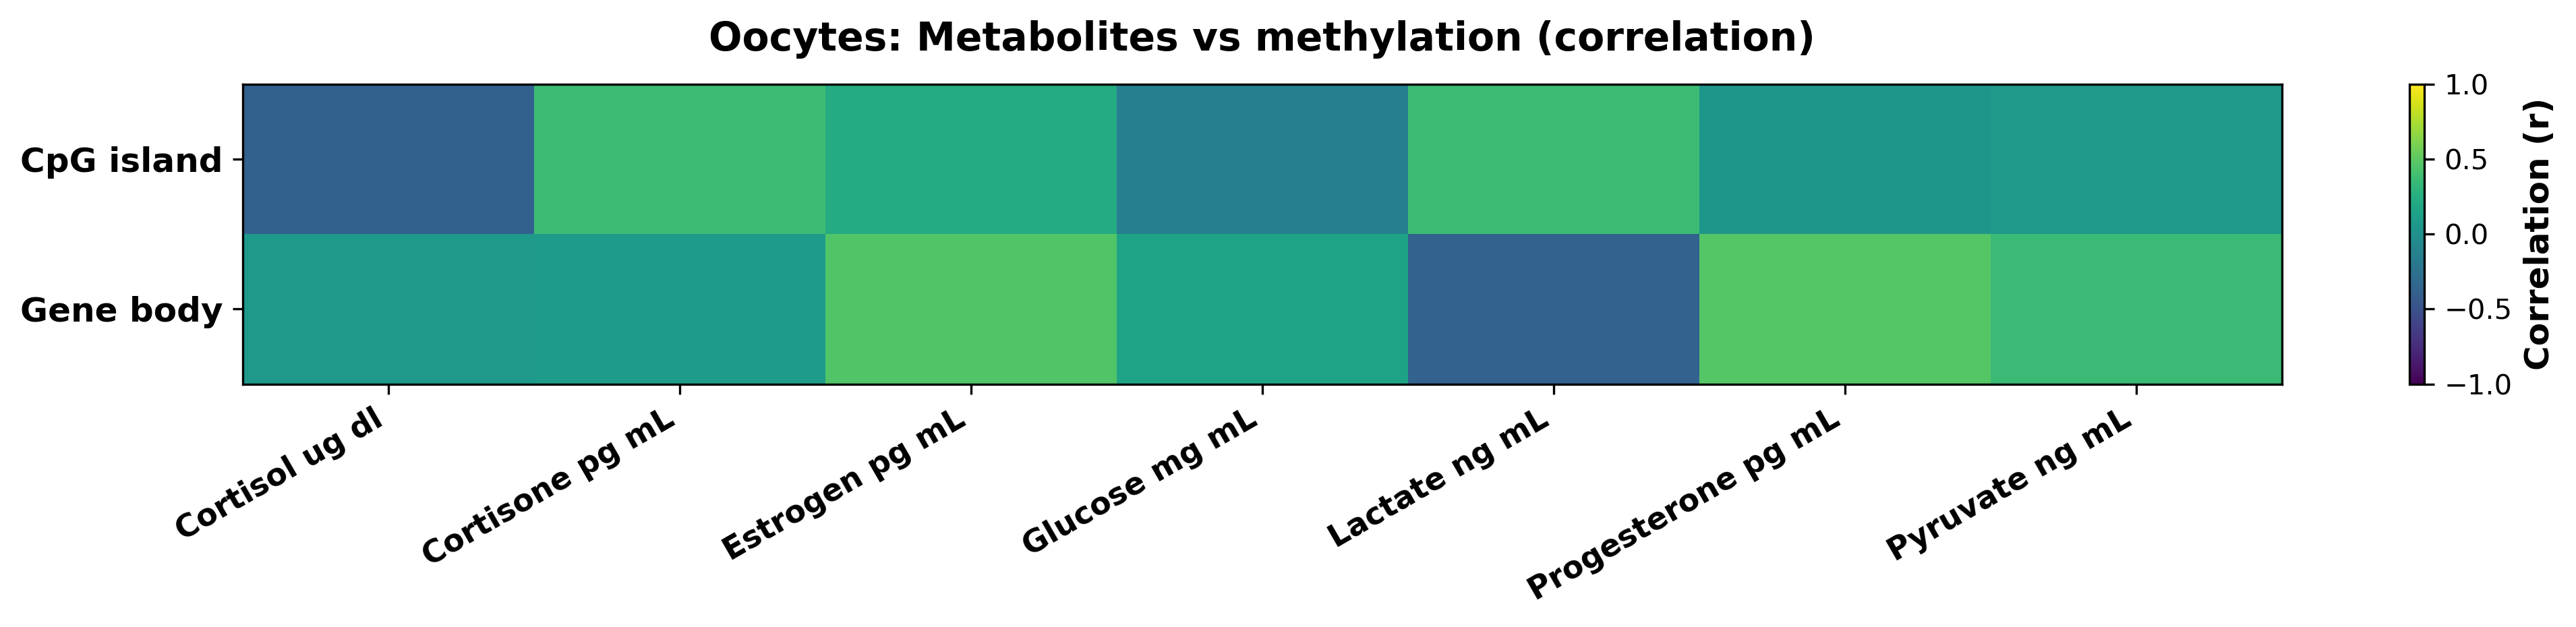

Saved: NHIP_heatmap_Oocytes_corr.pdf


In [19]:
def make_heatmap(df, tissue, out_png):
    d = df[df["Tissue"] == tissue].copy()
    if d.empty:
        print("No rows for", tissue)
        return

    # Create a combined methylation label (2 rows: CpG island vs GeneBody)
    d["MethLabel"] = d["Methylation"].replace({
        "CpG_island_mean": "CpG island",
        "GeneBody_mean": "Gene body"
    })

    # Keep metabolite names short/nice
    def nice_met(x):
        x = str(x)
        x = x.replace("_Values_", " ").replace("_values_", " ")
        x = x.replace("_ug_dl", " (ug/dl)")
        x = x.replace("_ng_mL", " (ng/mL)")
        x = x.replace("_pg_mL", " (pg/mL)")
        x = x.replace("_mg_mL", " (mg/mL)")
        x = x.replace("_", " ")
        return x

    d["MetLabel"] = d["Metabolite"].apply(nice_met)

    # Pivot into a matrix
    mat = d.pivot(index="MethLabel", columns="MetLabel", values="Correlation")
    fdr = d.pivot(index="MethLabel", columns="MetLabel", values="P_value")

    # Plot
    fig, ax = plt.subplots(figsize=(14, 3.2))
    im = ax.imshow(mat.values, aspect="auto", vmin=-1, vmax=1)

    ax.set_xticks(np.arange(mat.shape[1]))
    ax.set_xticklabels(mat.columns, rotation=30, ha="right", fontsize=11, fontweight="bold")

    ax.set_yticks(np.arange(mat.shape[0]))
    ax.set_yticklabels(mat.index, fontsize=12, fontweight="bold")

    ax.set_title(f"{tissue}: Metabolites vs methylation (correlation)", fontsize=14, fontweight="bold", pad=12)

    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Correlation (r)", fontsize=12, fontweight="bold")

    # Optional: annotate significance stars by FDR
    #   *  <0.05, ** <0.01, *** <0.001
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            val = mat.values[i, j]
            p = fdr.values[i, j]
            if np.isnan(val) or np.isnan(p):
                continue
            star = ""
            if p < 0.001:
                star = "***"
            elif p < 0.01:
                star = "**"
            elif p < 0.05:
                star = "*"
            ax.text(j, i, star, ha="center", va="center", fontsize=14, fontweight="bold", color="black")

    plt.tight_layout()
    plt.savefig(out_png, dpi=300)
    plt.show()
    print("Saved:", out_png)

make_heatmap(df_corr, "Cumulus", "NHIP_heatmap_Cumulus_corr.pdf")
make_heatmap(df_corr, "Oocytes", "NHIP_heatmap_Oocytes_corr.pdf")


12- Bar plot of the top correlations (by FDR)
This highlights the strongest metabolite associations.

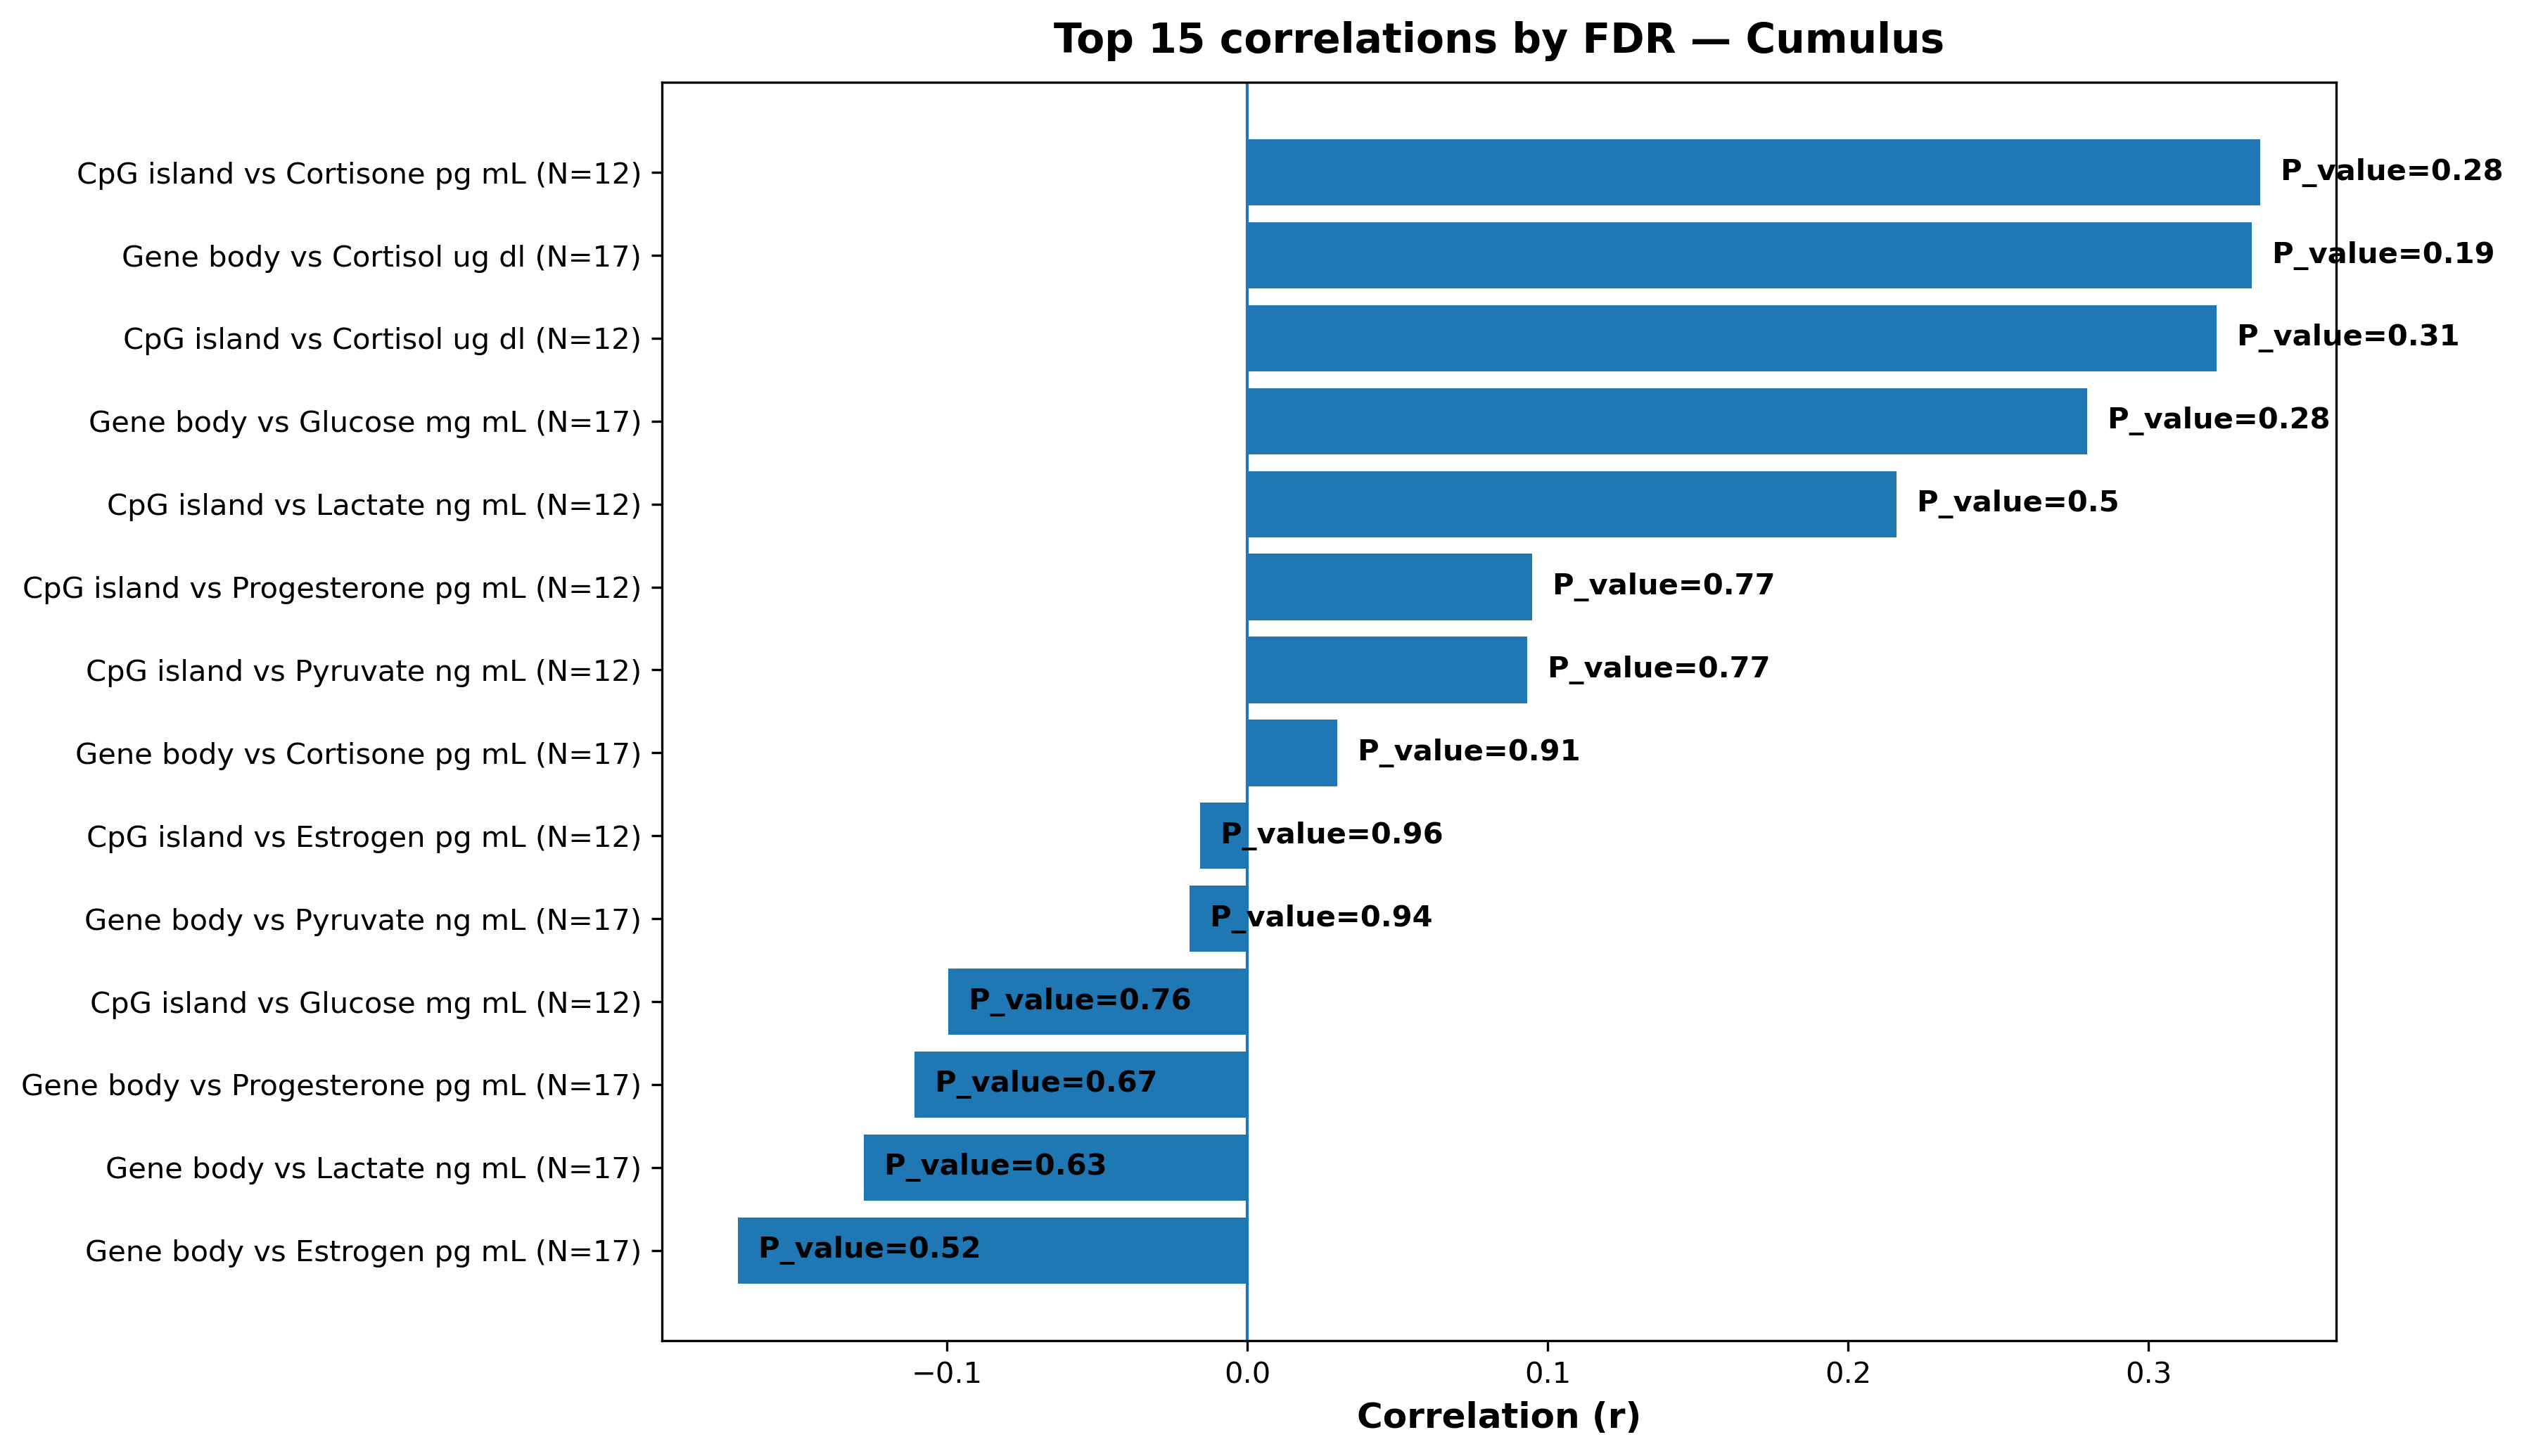

Saved: NHIP_top15_bar_Cumulus.pdf


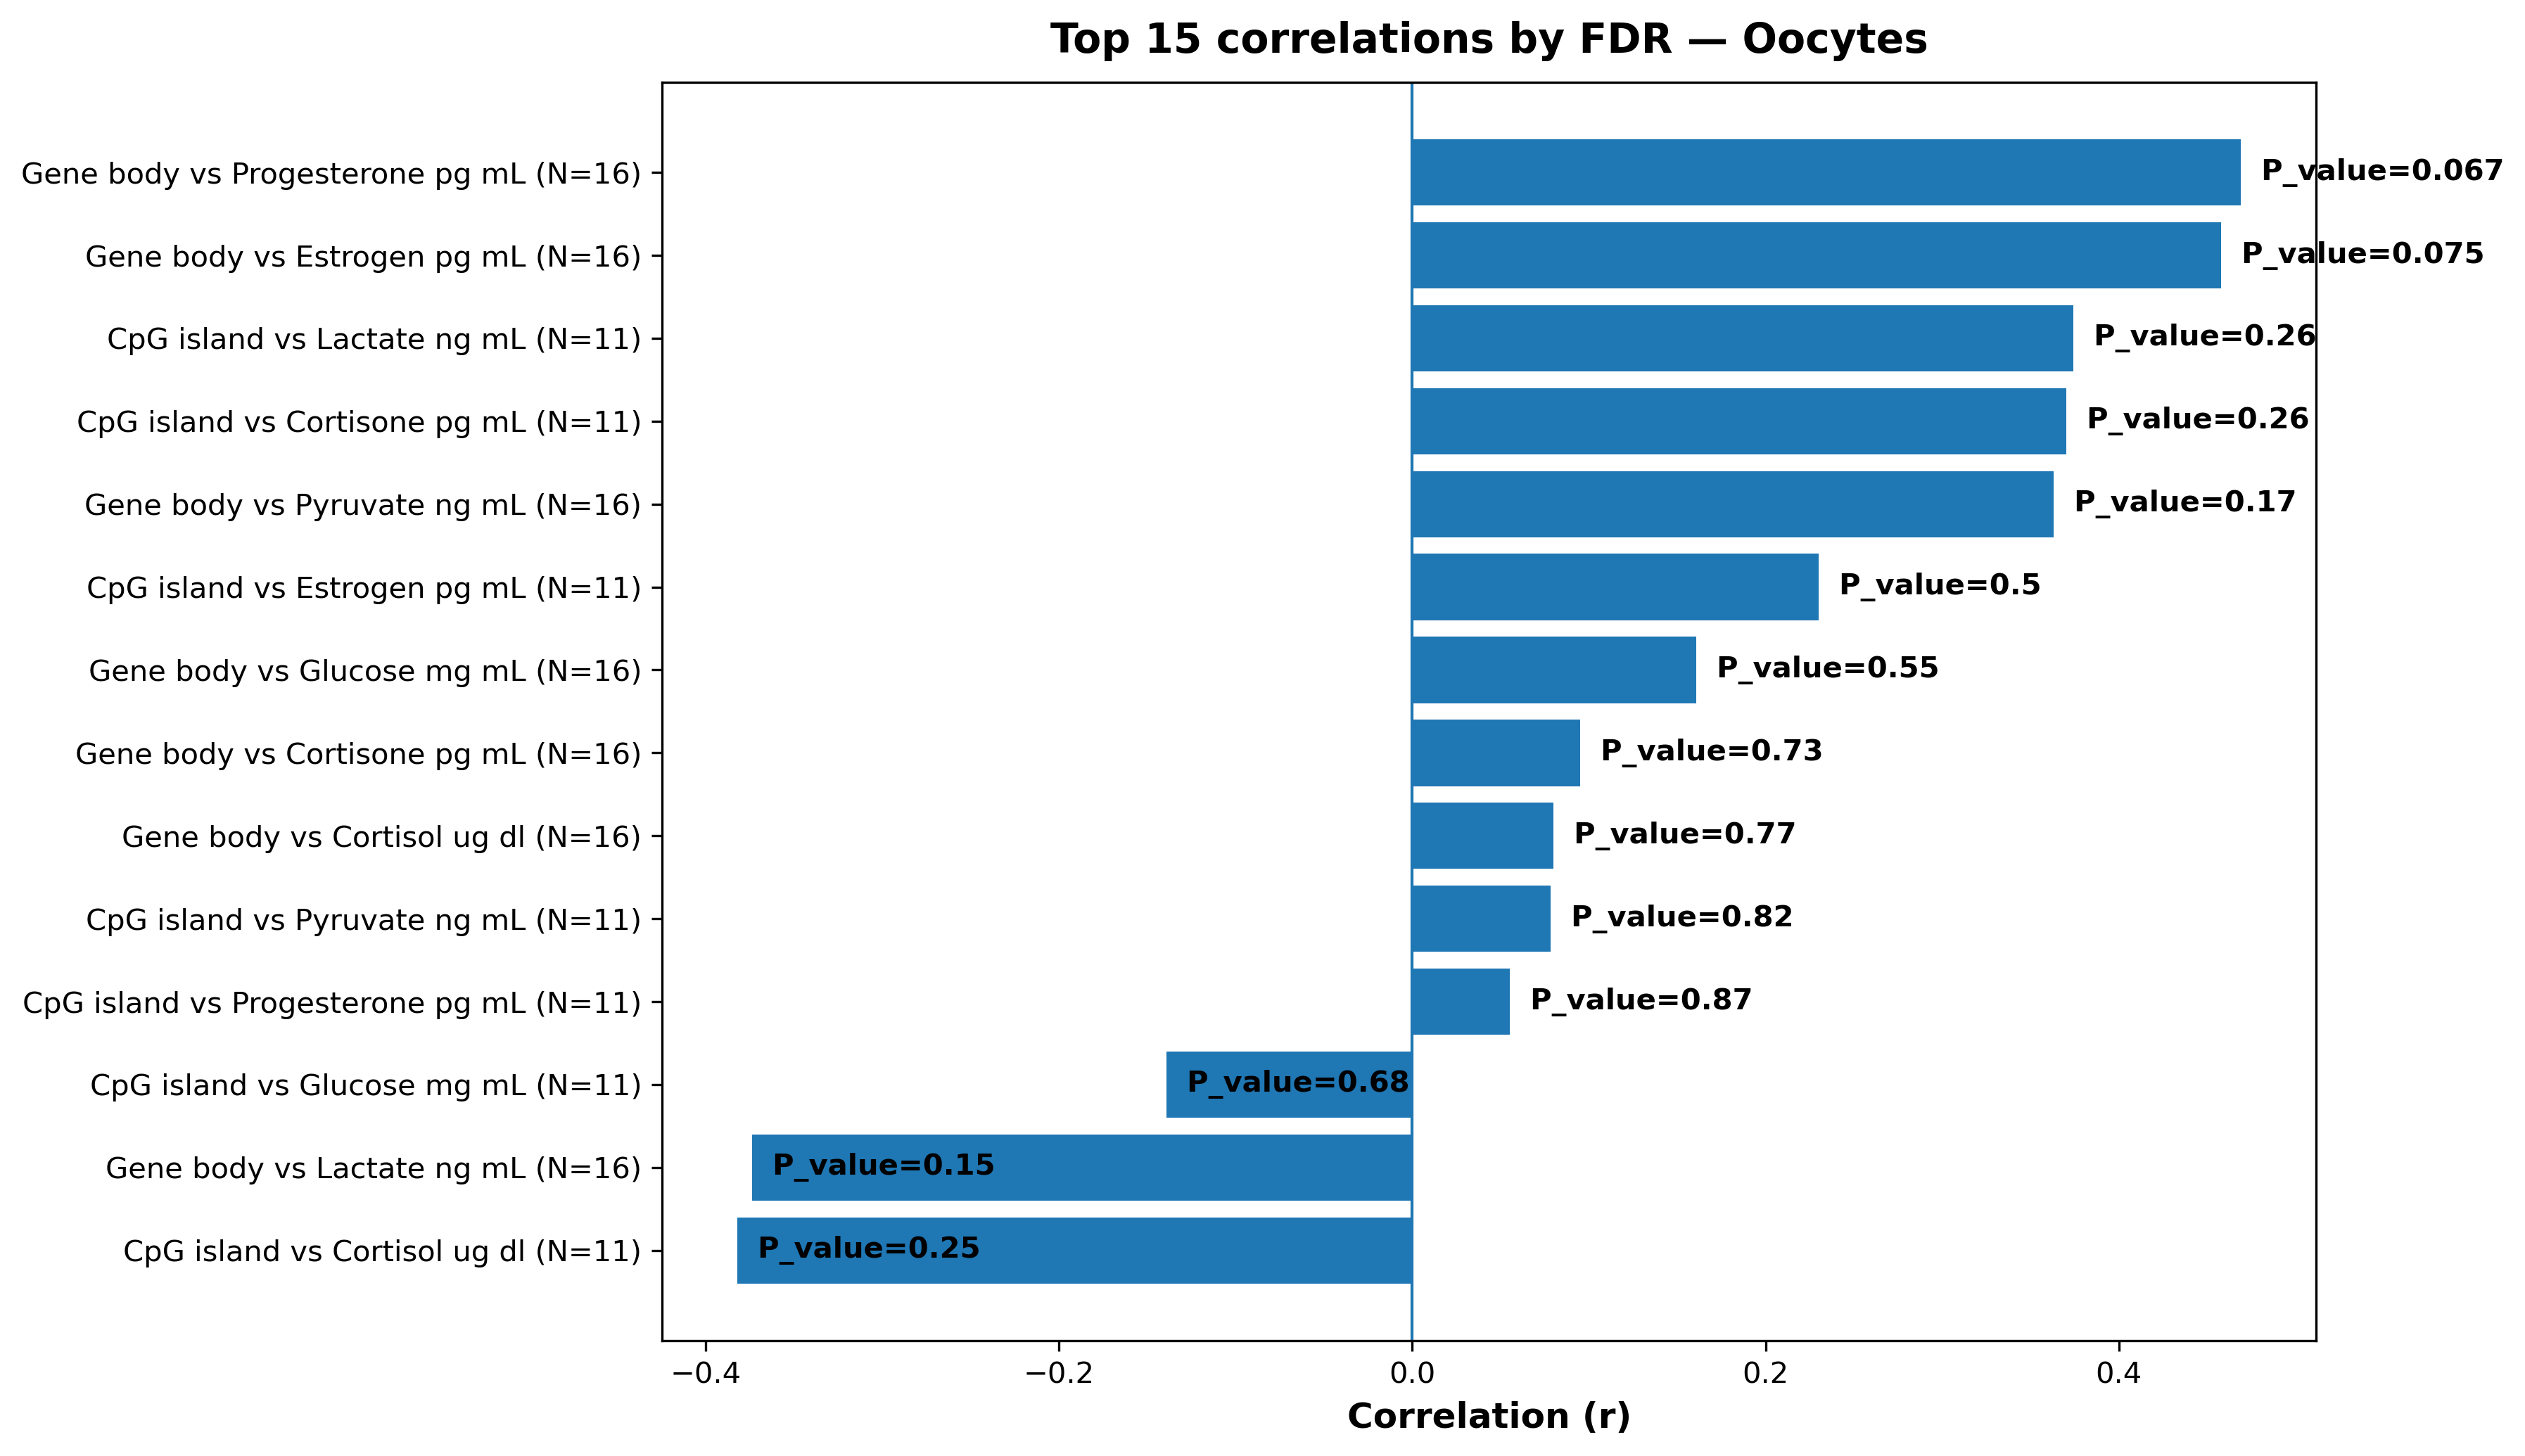

Saved: NHIP_top15_bar_Oocytes.pdf


In [20]:
def top_barplot(df, tissue=None, top_n=15, out_png="NHIP_top_corr_bar.png"):
    d = df.copy()
    if tissue is not None:
        d = d[d["Tissue"] == tissue].copy()

    d = d.dropna(subset=["Correlation", "P_value"])
    d = d.sort_values("P_value").head(top_n)

    if d.empty:
        print("No data to plot.")
        return

    # Create nice labels
    d["MethLabel"] = d["Methylation"].replace({
        "CpG_island_mean": "CpG island",
        "GeneBody_mean": "Gene body"
    })

    def nice_met(x):
        x = str(x)
        x = x.replace("_Values_", " ").replace("_values_", " ")
        x = x.replace("_ug_dl", " (ug/dl)")
        x = x.replace("_ng_mL", " (ng/mL)")
        x = x.replace("_pg_mL", " (pg/mL)")
        x = x.replace("_mg_mL", " (mg/mL)")
        x = x.replace("_", " ")
        return x

    d["MetLabel"] = d["Metabolite"].apply(nice_met)
    d["Label"] = d["MethLabel"] + " vs " + d["MetLabel"] + " (N=" + d["N_animals"].astype(str) + ")"

    # Sort for display (most significant on top)
    d = d.sort_values("Correlation")

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.barh(d["Label"], d["Correlation"])

    ax.axvline(0, linewidth=1)
    ax.set_xlabel("Correlation (r)", fontsize=12, fontweight="bold")

    title = f"Top {top_n} correlations by FDR"
    if tissue is not None:
        title += f" — {tissue}"
    ax.set_title(title, fontsize=14, fontweight="bold", pad=10)

    ax.tick_params(axis="y", labelsize=10)

    # Annotate FDR
    for i, (_, row) in enumerate(d.iterrows()):
        ax.text(
            row["Correlation"],
            i,
            f"  P_value={row['P_value']:.2g}",
            va="center",
            fontsize=10,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.savefig(out_png, dpi=300)
    plt.show()
    print("Saved:", out_png)

top_barplot(df_corr, tissue="Cumulus", top_n=15, out_png="NHIP_top15_bar_Cumulus.pdf")
top_barplot(df_corr, tissue="Oocytes", top_n=15, out_png="NHIP_top15_bar_Oocytes.pdf")


13- separated plots by tissue and methylation feature

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def make_heatmap_by_feature(df, tissue, meth_col, fdr_col="FDR_sepTissueMeth", out_pdf=None):
    d = df[(df["Tissue"] == tissue) & (df["Methylation"] == meth_col)].copy()
    if d.empty:
        print(f"No rows for {tissue} — {meth_col}")
        return

    meth_label = {"CpG_island_mean": "CpG island", "GeneBody_mean": "Gene body"}.get(meth_col, meth_col)

    def nice_met(x):
        x = str(x)
        x = x.replace("_Values_", " ").replace("_values_", " ")
        x = x.replace("_ug_dl", " (ug/dl)")
        x = x.replace("_ng_mL", " (ng/mL)")
        x = x.replace("_pg_mL", " (pg/mL)")
        x = x.replace("_mg_mL", " (mg/mL)")
        x = x.replace("_", " ")
        return x

    d["MetLabel"] = d["Metabolite"].apply(nice_met)

    # Make a 1 x (#metabolites) matrix
    d = d.sort_values("MetLabel")
    corr_vals = d["Correlation"].values.reshape(1, -1)

    # FDR matrix (same shape)
    if fdr_col in d.columns:
        fdr_vals = d[fdr_col].values.reshape(1, -1)
    else:
        fdr_vals = np.full_like(corr_vals, np.nan, dtype=float)

    fig, ax = plt.subplots(figsize=(14, 2.6))
    im = ax.imshow(corr_vals, aspect="auto", vmin=-1, vmax=1)

    ax.set_xticks(np.arange(len(d["MetLabel"])))
    ax.set_xticklabels(d["MetLabel"], rotation=30, ha="right", fontsize=11, fontweight="bold")

    ax.set_yticks([0])
    ax.set_yticklabels([meth_label], fontsize=12, fontweight="bold")

    ax.set_title(f"{tissue}: {meth_label} vs metabolites (Pearson r)", fontsize=14, fontweight="bold", pad=10)

    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Pearson r", fontsize=12, fontweight="bold")

    # stars by FDR
    for j in range(corr_vals.shape[1]):
        q = fdr_vals[0, j]
        if np.isnan(q):
            continue
        star = ""
        if q < 0.001:
            star = "***"
        elif q < 0.01:
            star = "**"
        elif q < 0.05:
            star = "*"
        ax.text(j, 0, star, ha="center", va="center", fontsize=14, fontweight="bold", color="black")

    plt.tight_layout()

    if out_pdf is not None:
        plt.savefig(out_pdf, dpi=300)
        print("Saved:", out_pdf)

    plt.show()


Saved: NHIP_heatmap_Cumulus_CpGisland.pdf


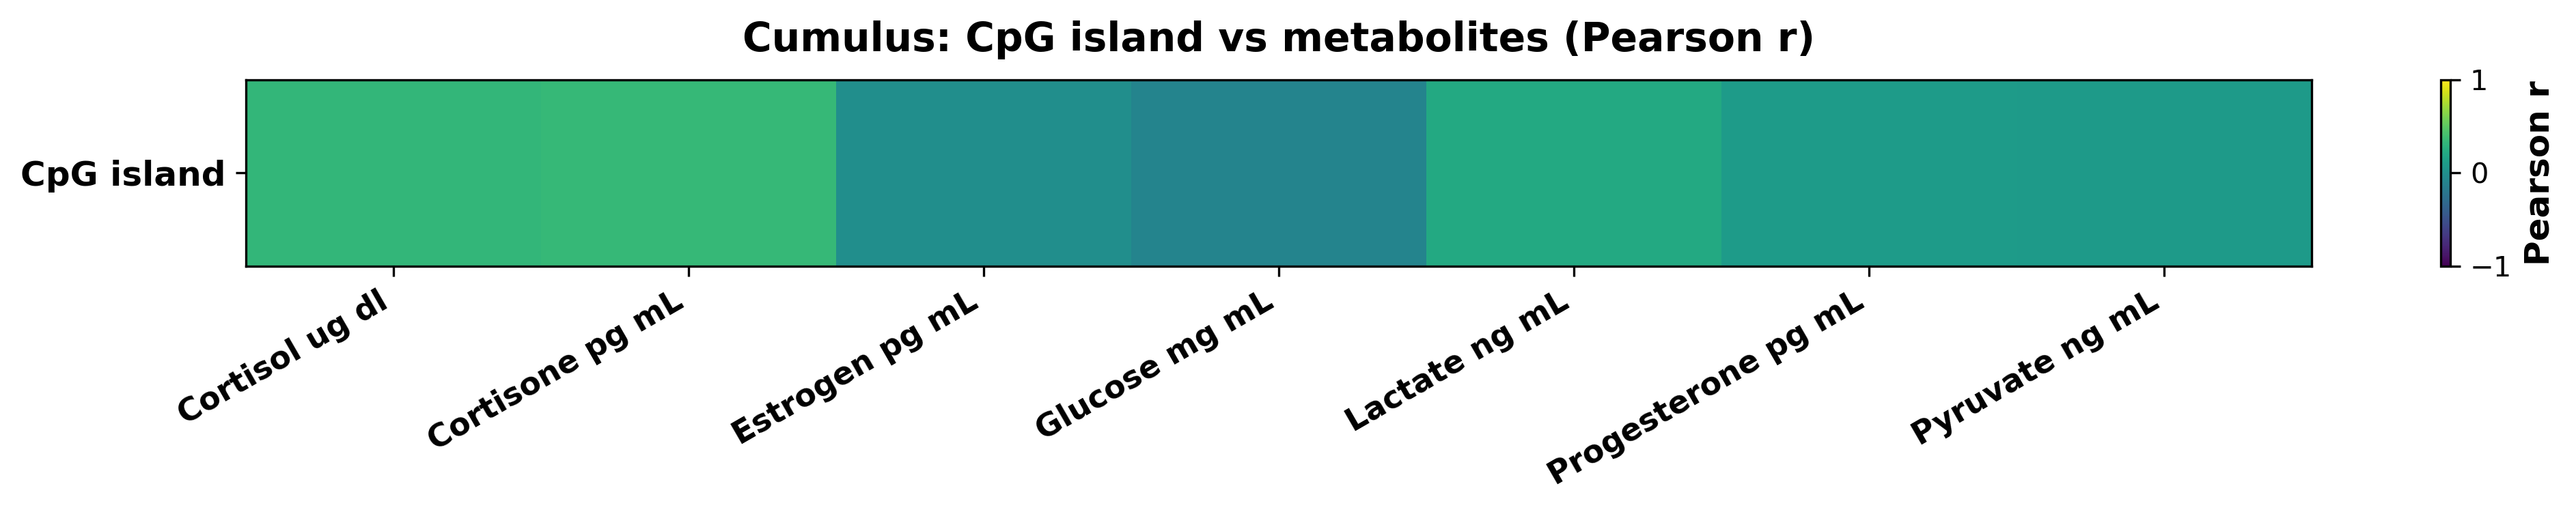

Saved: NHIP_heatmap_Cumulus_GeneBody.pdf


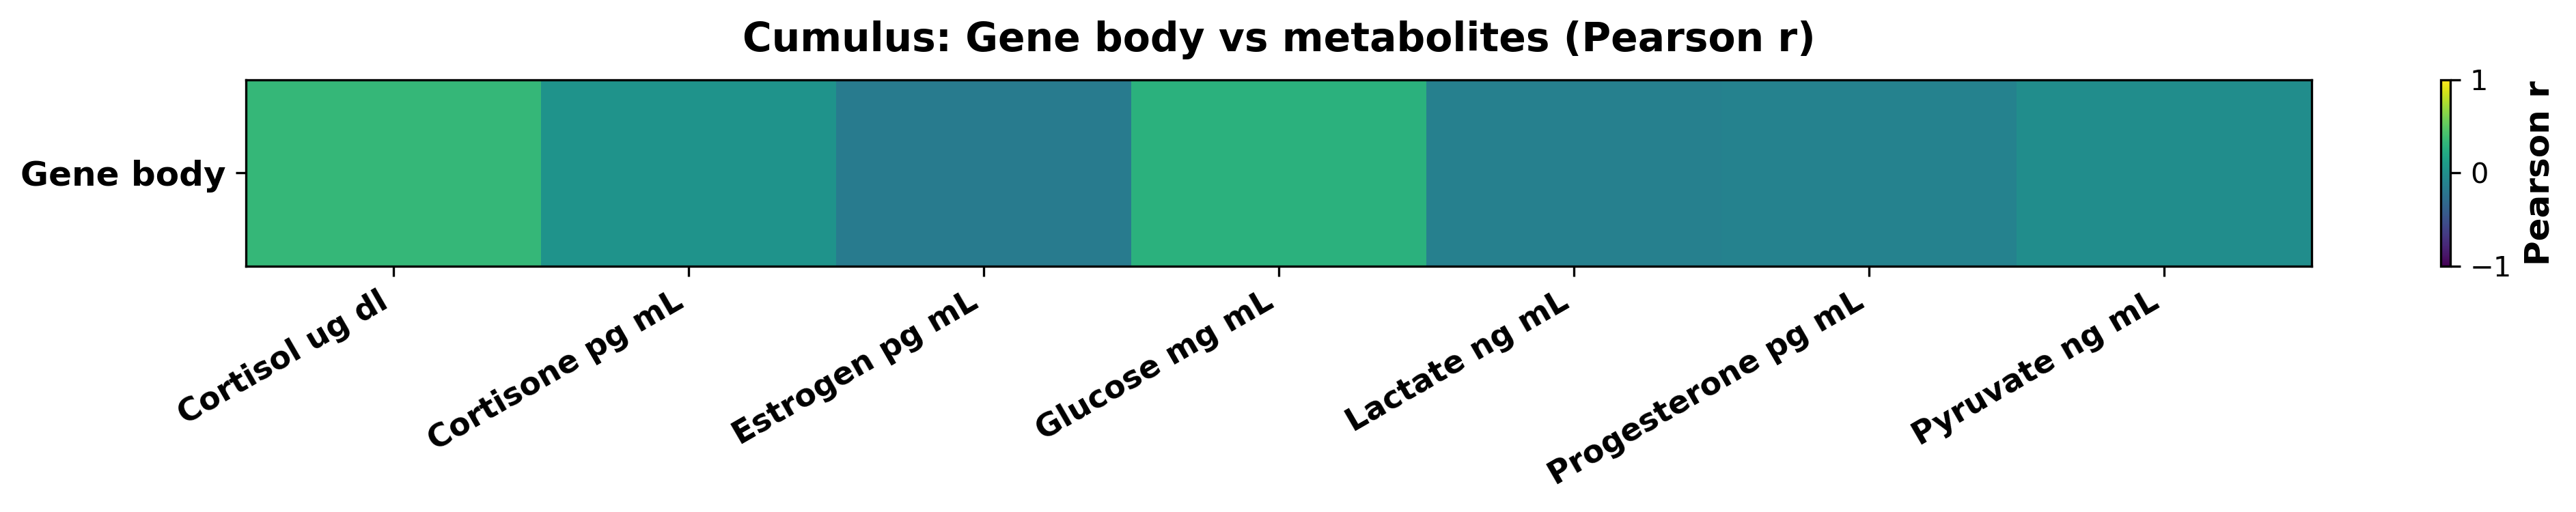

Saved: NHIP_heatmap_Oocytes_CpGisland.pdf


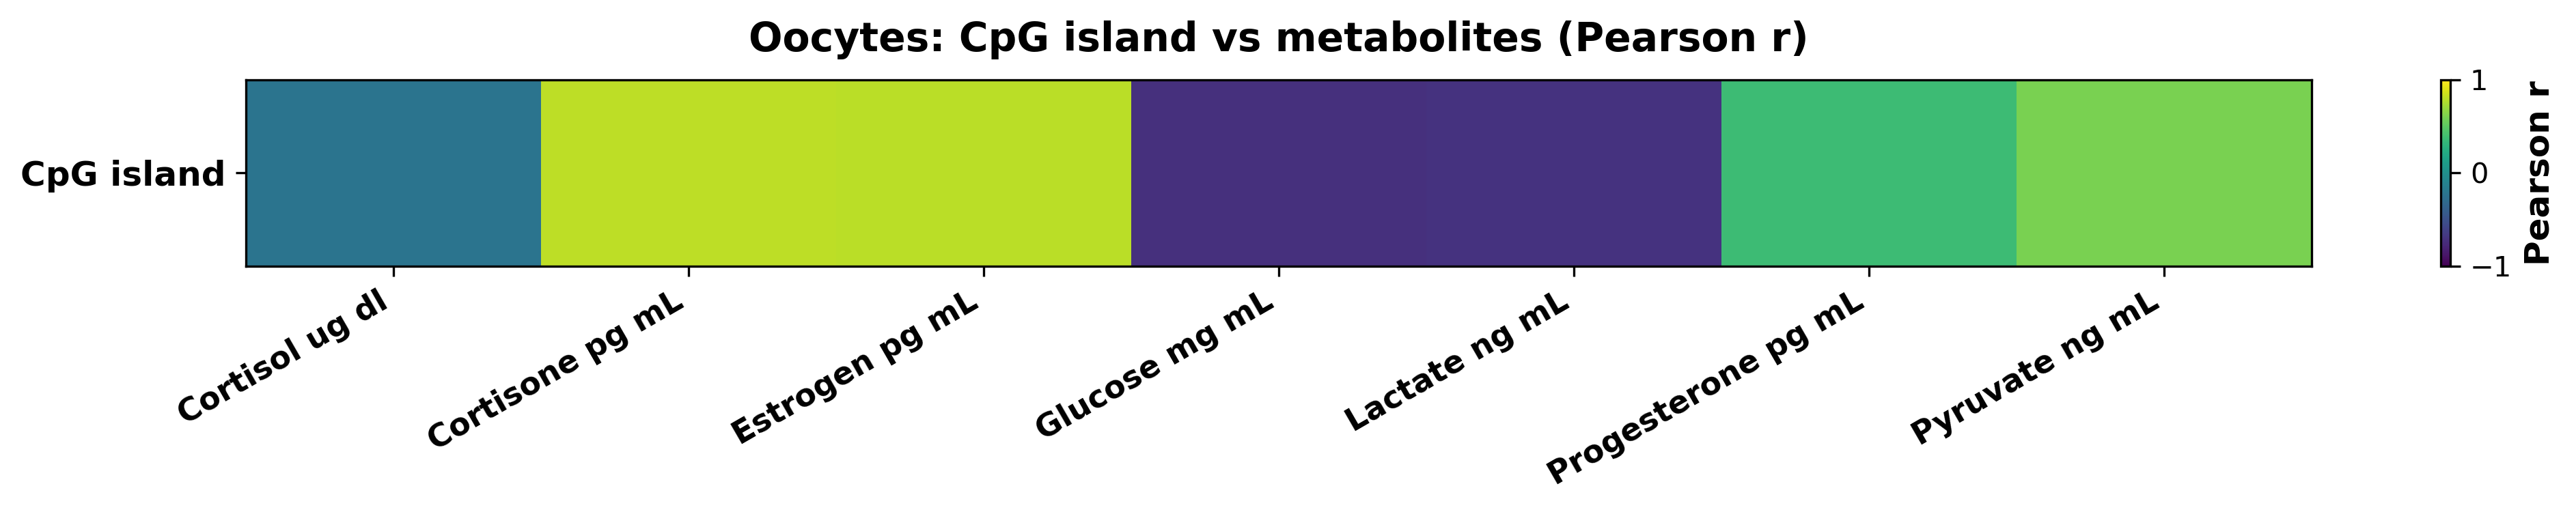

Saved: NHIP_heatmap_Oocytes_GeneBody.pdf


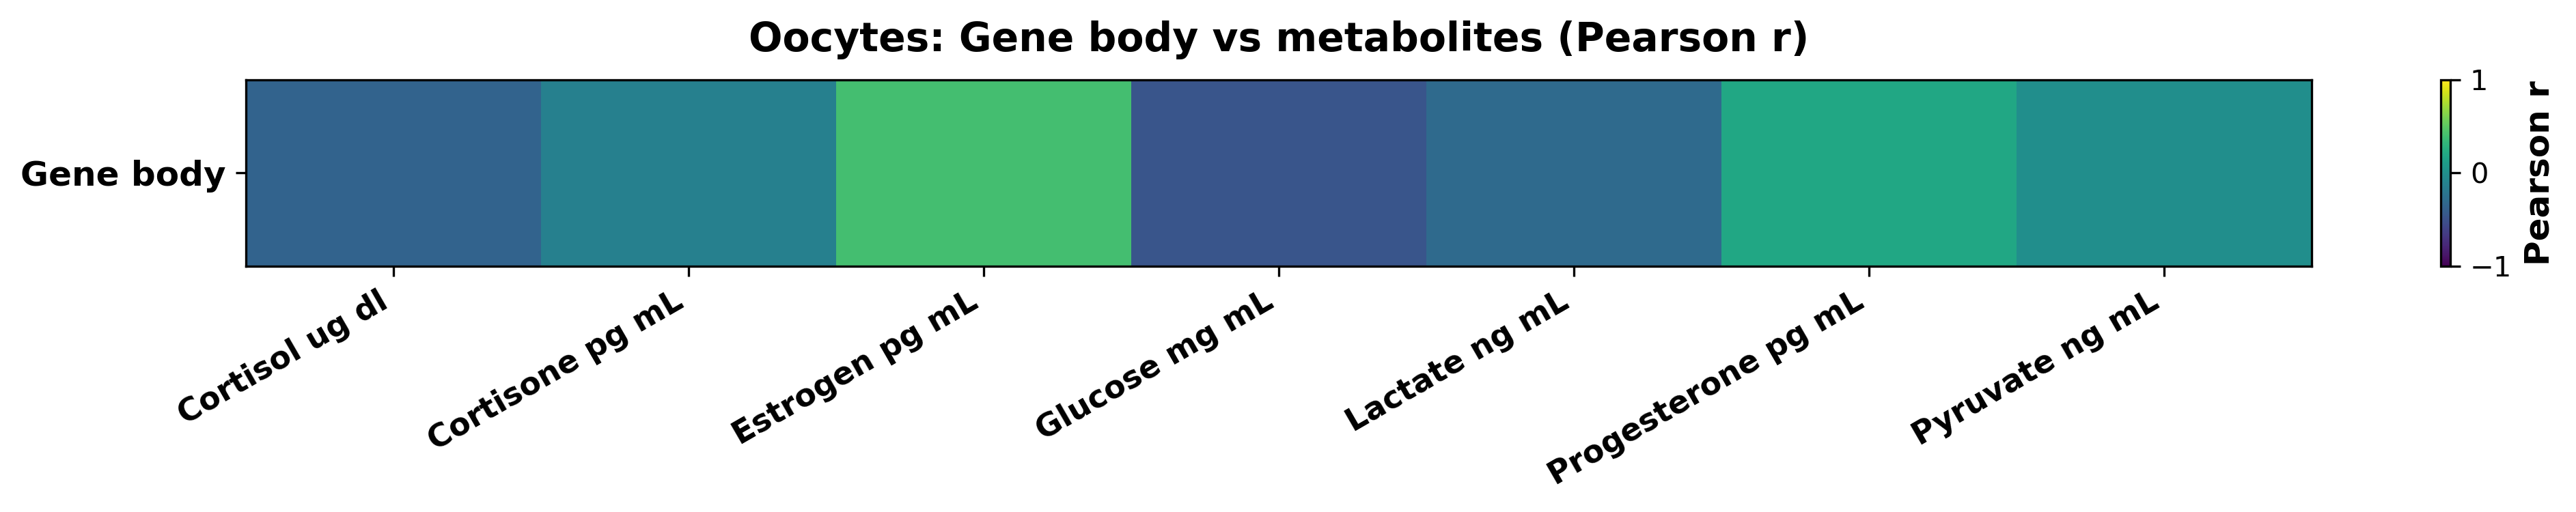

In [127]:
for tissue in ["Cumulus", "Oocytes"]:
    make_heatmap_by_feature(df_corr, tissue, "CpG_island_mean",
                            fdr_col="FDR_sepTissueMeth",
                            out_pdf=f"NHIP_heatmap_{tissue}_CpGisland.pdf")
    make_heatmap_by_feature(df_corr, tissue, "GeneBody_mean",
                            fdr_col="FDR_sepTissueMeth",
                            out_pdf=f"NHIP_heatmap_{tissue}_GeneBody.pdf")


14- separated plots by tissue and methylation feature 

In [141]:
def barplot_all_corr(df, tissue, meth_col, pval_col="FDR_sepTissueMeth", out_pdf=None):
    d = df[(df["Tissue"] == tissue) & (df["Methylation"] == meth_col)].copy()

    if d.empty:
        print(f"No data to plot for {tissue} — {meth_col}")
        return

    d = d.dropna(subset=["Correlation", "P_value"])
    if d.empty:
        print(f"No valid correlations for {tissue} — {meth_col}")
        return

    meth_label = {"CpG_island_mean": "CpG island", "GeneBody_mean": "Gene body"}.get(meth_col, meth_col)

    def nice_met(x):
        x = str(x)
        x = x.replace("_Values_", " ").replace("_values_", " ")
        x = x.replace("_ug_dl", " (ug/dl)")
        x = x.replace("_ng_mL", " (ng/mL)")
        x = x.replace("_pg_mL", " (pg/mL)")
        x = x.replace("_mg_mL", " (mg/mL)")
        x = x.replace("_", " ")
        return x

    d["MetLabel"] = d["Metabolite"].apply(nice_met)
    d["Label"] = d["MetLabel"] + " (N=" + d["N_animals"].astype(str) + ")"

    # Sort by correlation (or by FDR, your choice)
    d = d.sort_values("Correlation")

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.barh(d["Label"], d["Correlation"])
    ax.axvline(0, linewidth=1)

    ax.set_xlabel("Pearson r", fontsize=12, fontweight="bold")
    ax.set_title(f"{tissue}: {meth_label} vs metabolites (all correlations)", fontsize=14, fontweight="bold", pad=10)

    ax.tick_params(axis="y", labelsize=10)

    # Annotate FDR (if present)
    if pval_col in d.columns:
        for i, (_, row) in enumerate(d.iterrows()):
            q = row[pval_col]
            if pd.isna(q):
                continue
            ax.text(
                row["Correlation"],
                i,
                f"  P_value={q:.2g}",
                va="center",
                fontsize=10,
                fontweight="bold"
            )

    plt.tight_layout()

    if out_pdf is not None:
        plt.savefig(out_pdf, dpi=300)
        print("Saved:", out_pdf)

    plt.show()


Saved: NHIP_bar_Cumulus_CpGisland_all.pdf


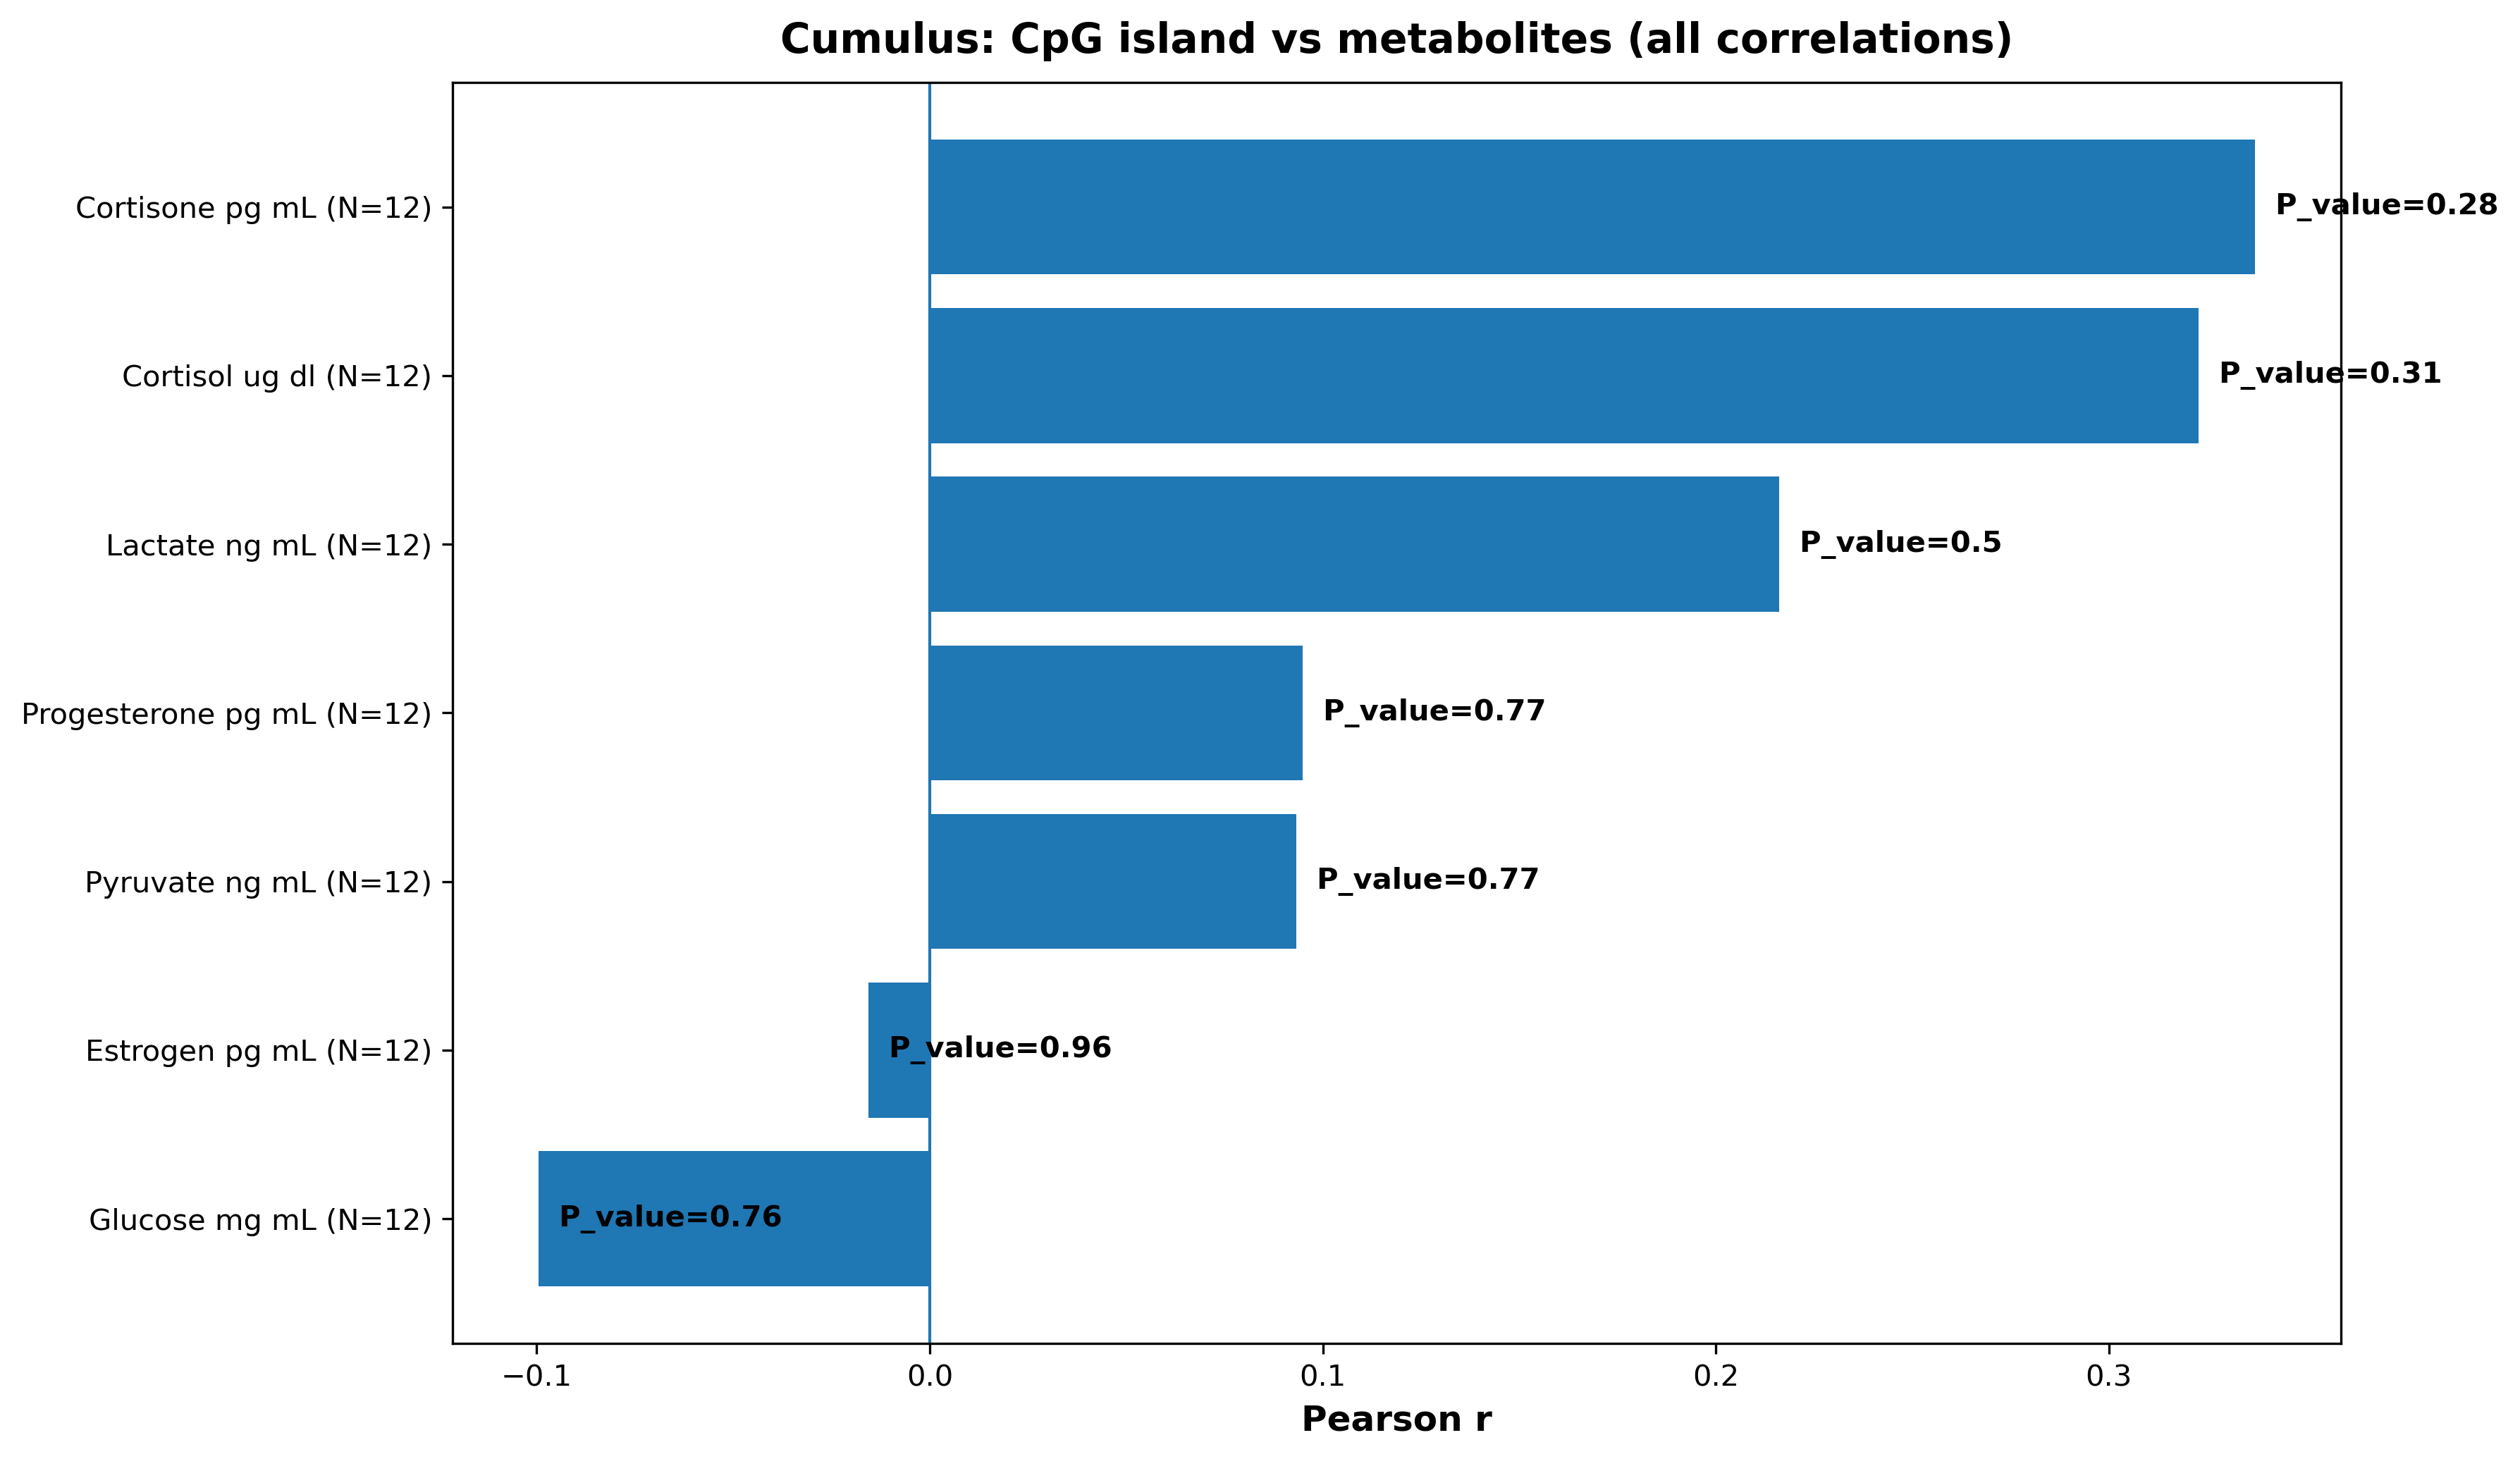

Saved: NHIP_bar_Cumulus_GeneBody_all.pdf


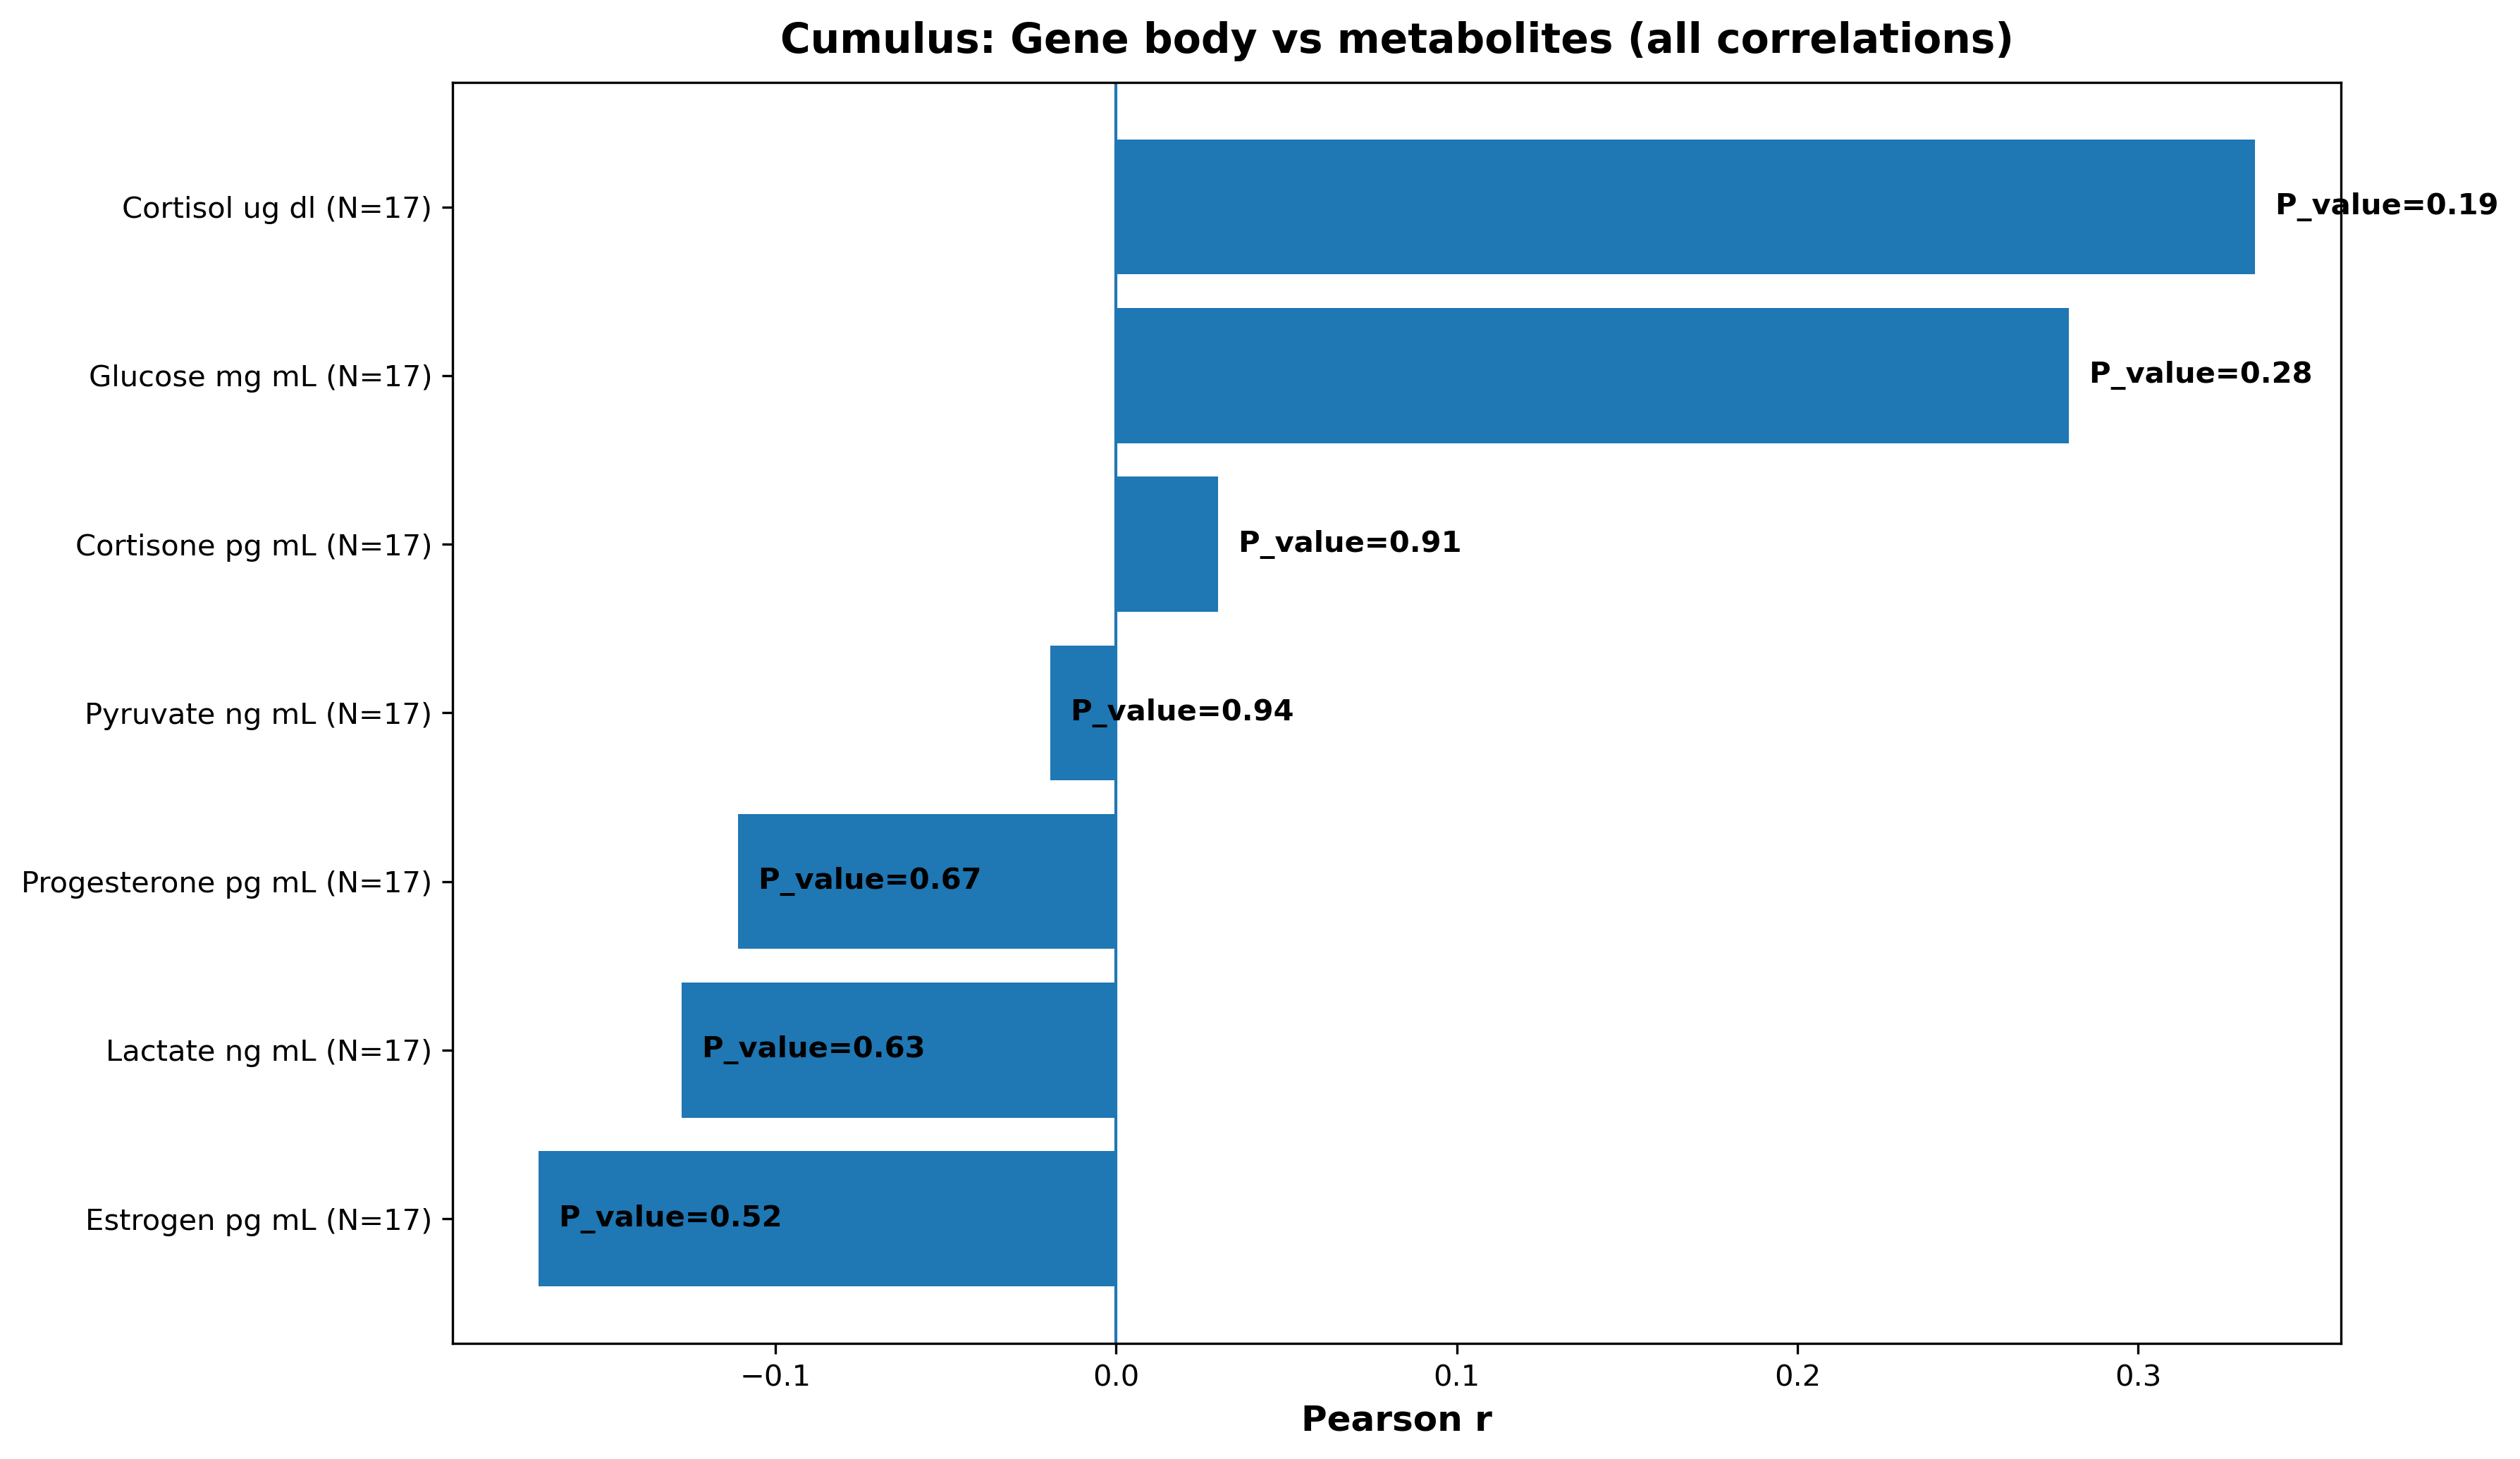

Saved: NHIP_bar_Oocytes_CpGisland_all.pdf


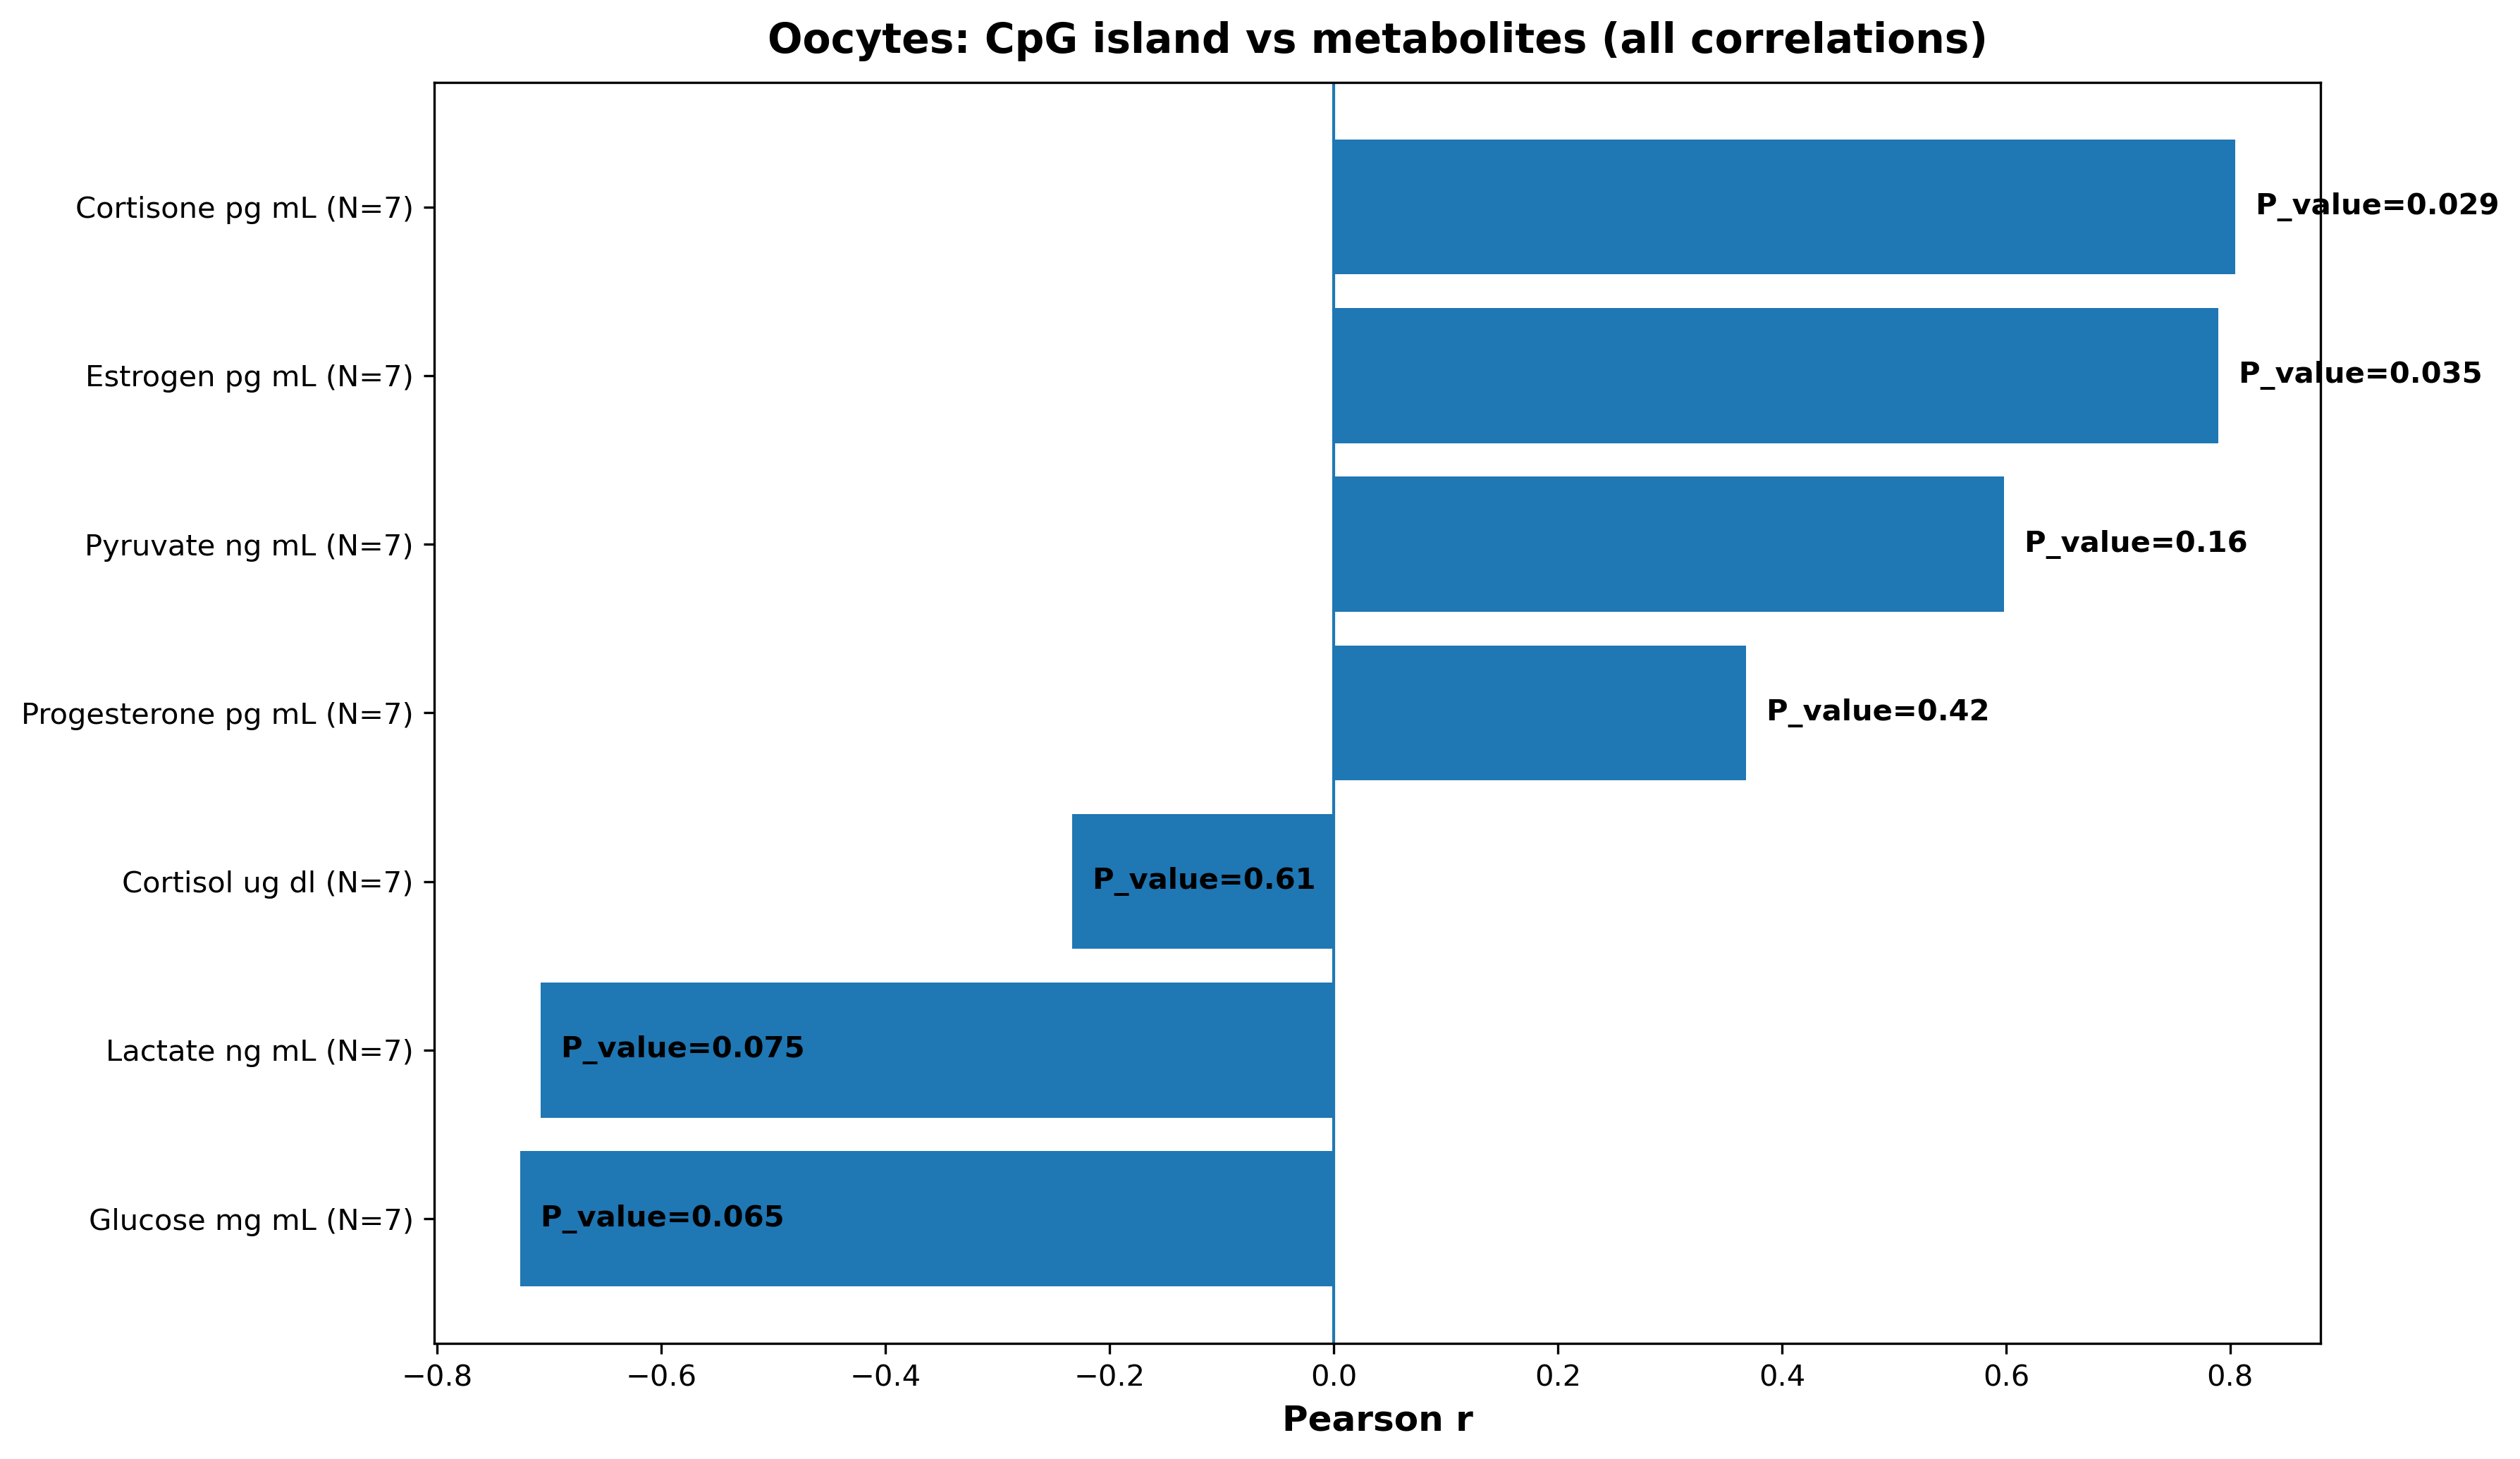

Saved: NHIP_bar_Oocytes_GeneBody_all.pdf


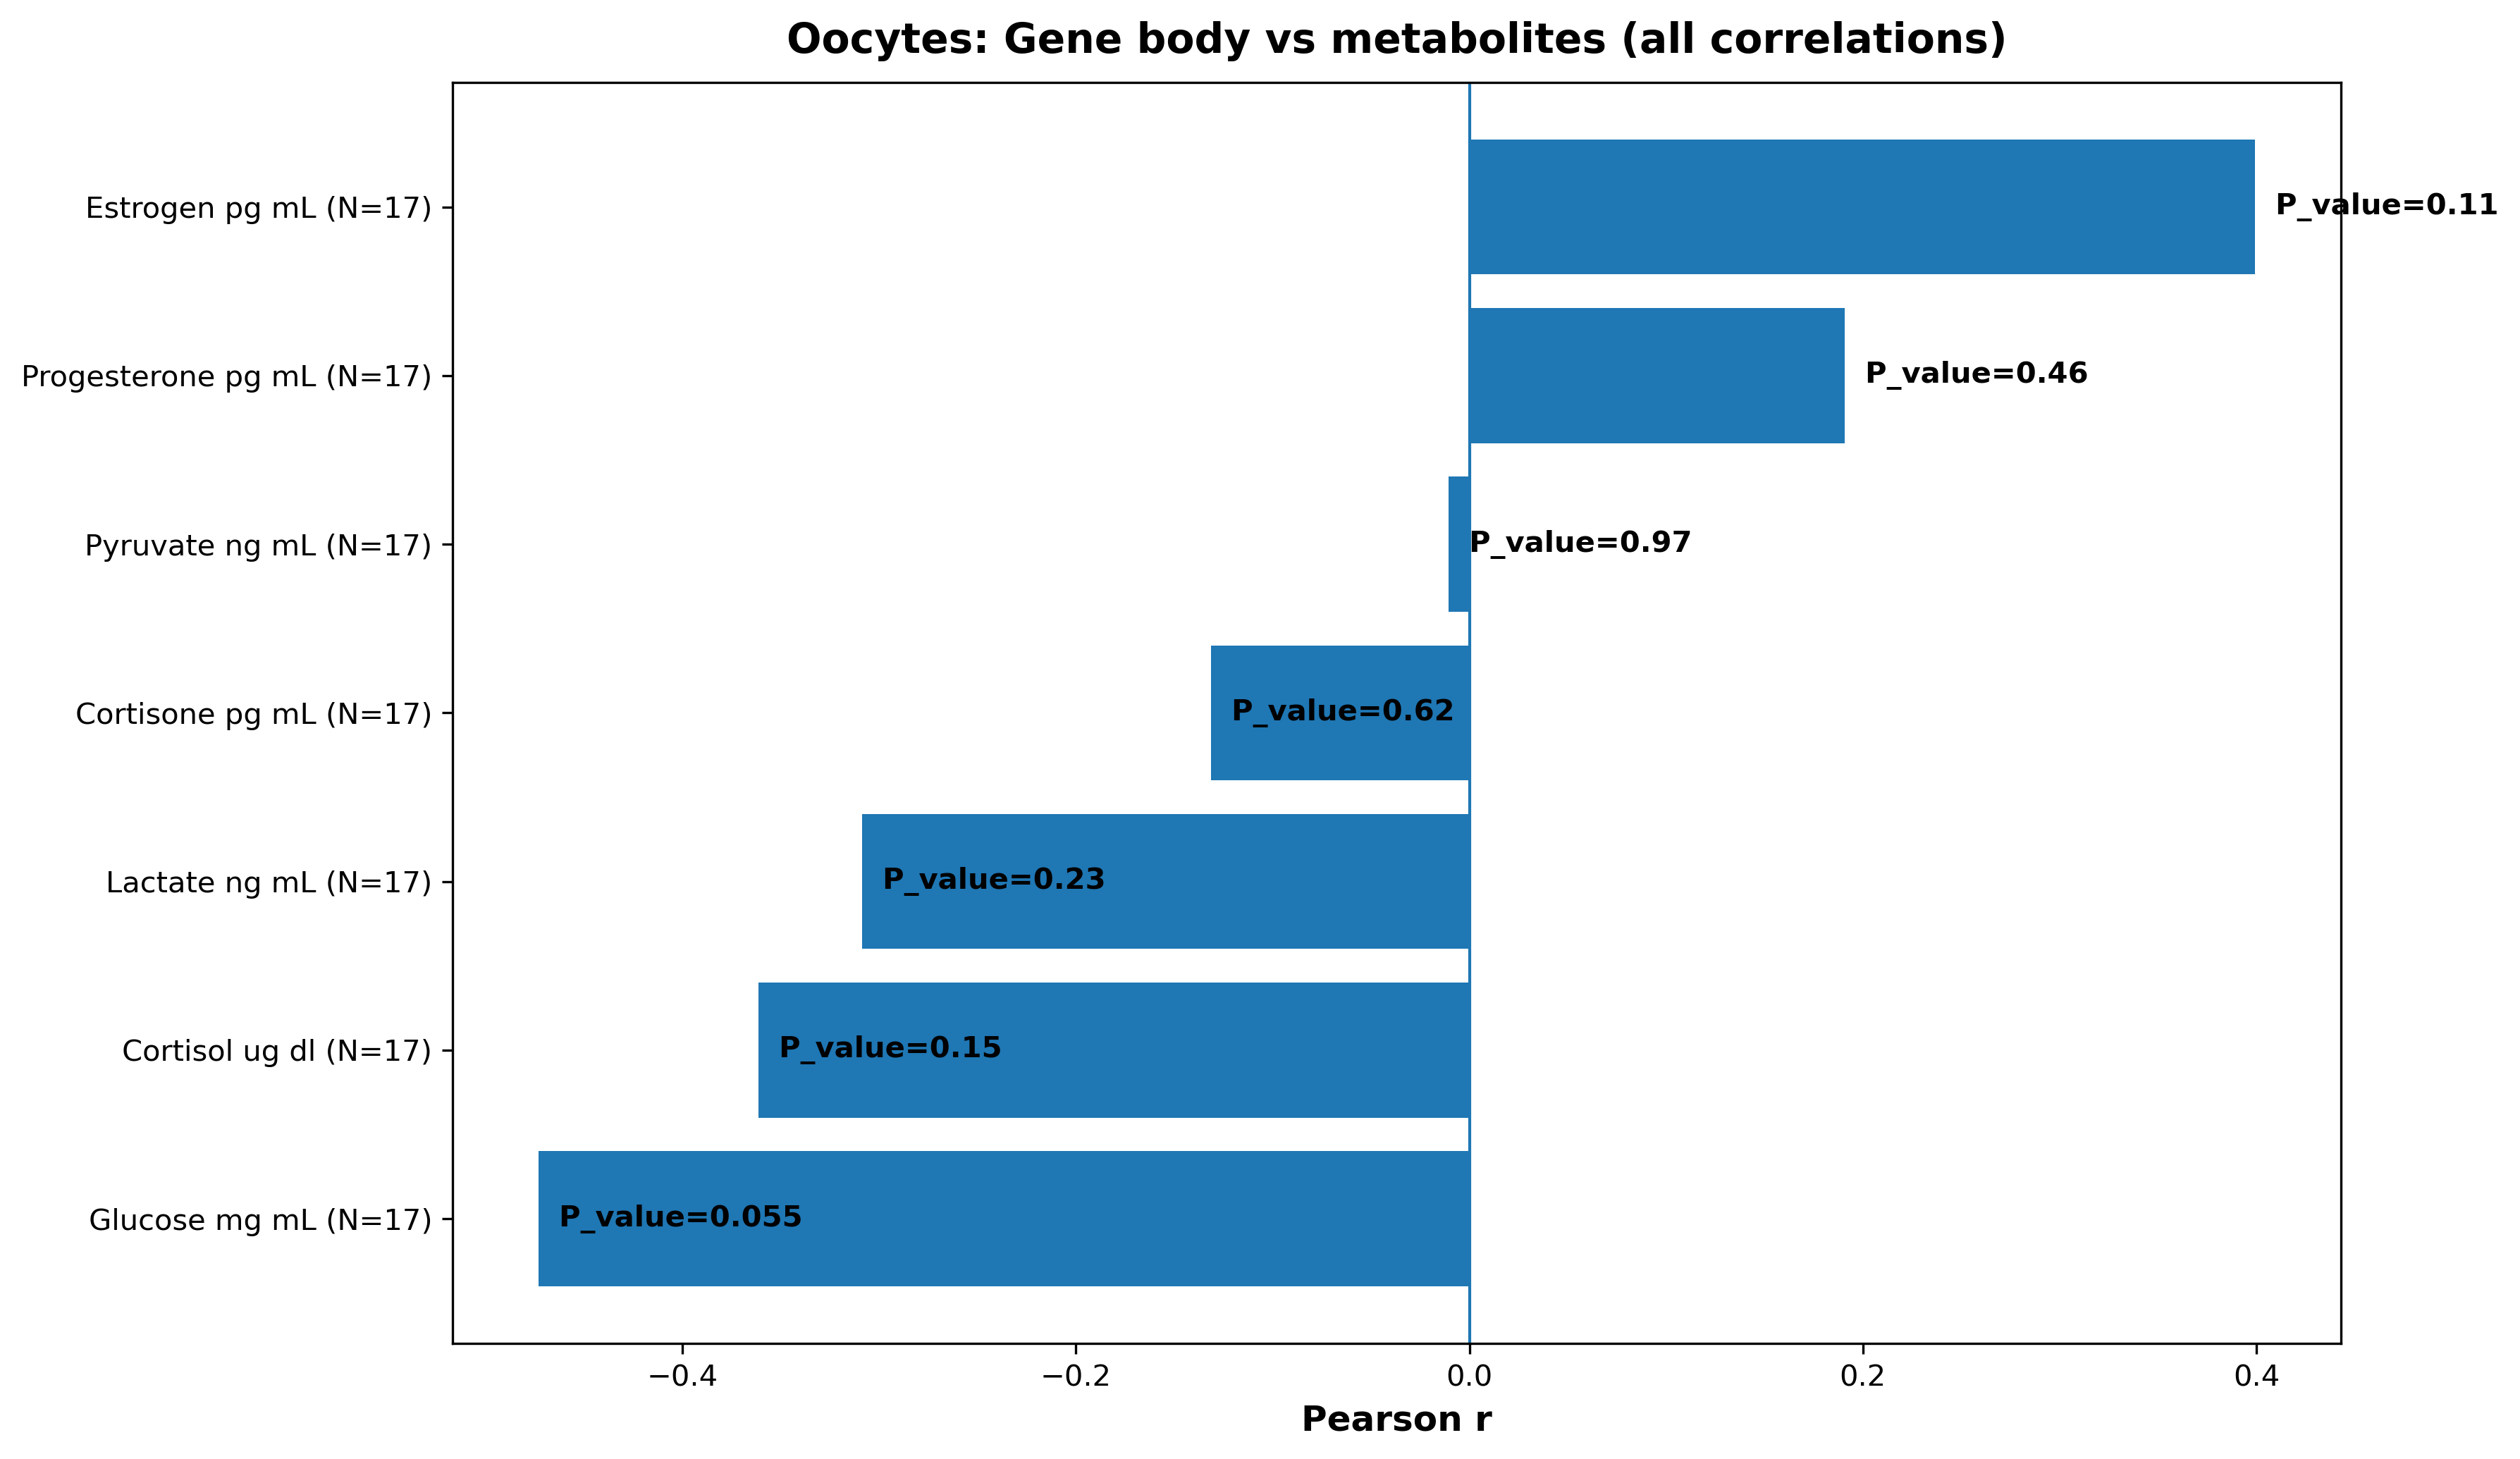

In [142]:
for tissue in ["Cumulus", "Oocytes"]:
    barplot_all_corr(df_corr, tissue, "CpG_island_mean",
                     pval_col="P_value",
                     out_pdf=f"NHIP_bar_{tissue}_CpGisland_all.pdf")
    barplot_all_corr(df_corr, tissue, "GeneBody_mean",
                     pval_col="P_value",
                     out_pdf=f"NHIP_bar_{tissue}_GeneBody_all.pdf")
